In [ ]:
import pandas as pd
import numpy as np
import os
import re

In [ ]:
pip install deep-translator

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/aiffel/Data/DLthon/train.csv")
test = pd.read_csv("/content/drive/MyDrive/aiffel/Data/DLthon/test.csv")
sub = pd.read_csv("/content/drive/MyDrive/aiffel/Data/DLthon/submission.csv")

In [ ]:
# Sentence-BERT
# MonoLogiC Electra

In [ ]:
# # 파일 읽기
# with open('/content/drive/MyDrive/aiffel/Data/DLthon/test1.txt', 'r', encoding='utf-8') as file:
#     data = file.read().splitlines()  # 줄바꿈 기준으로 나눔

# # 첫 번째 줄을 열 이름으로 설정하고, 나머지를 데이터로 변환
# columns = data[0]  # 첫 번째 줄이 열 이름
# data = data[1:]    # 나머지는 실제 데이터

# # DataFrame으로 변환
# test1 = pd.DataFrame(data, columns=[columns])

# # 결과 출력
# test1
# test['text'] = test1['text']

In [ ]:
import random
random.seed(2024)
# 기타괴롭힘
base_conversations = [

]

# 생성 함수
def generate_augmented_conversations(base_conversations, num_samples=50):
    augmented_conversations = []

    for _ in range(num_samples):
        base1 = random.choice([
        ])
        base2 = random.choice([
        ])
        base3 = random.choice([
        ])
        base4 = random.choice([
            ""
        ])

        augmented_conversation = (
            f"{base1}\n"
            f"{base2}\n"
            f"{base3}"
            f"{base4}"
        )

        augmented_conversations.append(augmented_conversation)
    return augmented_conversations

# 200개
augmented_data = generate_augmented_conversations(base_conversations, num_samples=200)

for conversation in augmented_data:
    print(conversation)

def conversations_to_dataframe(augmented_data):
    return pd.DataFrame(augmented_data, columns=["conversation"])

conversation_df1 = conversations_to_dataframe(augmented_data)
conversation_df1['class'] = "기타 괴롭힘 대화"
conversation_df1['idx'] = range(3950,3950 + len(conversation_df1))
conversation_df1

In [ ]:
rows_to_delete = [171, 355, 444, 485, 563, 637, 800, 1105, 1320, 1593, 1604, 1745, 1749,
                  1853, 2511, 2552, 2623, 2703, 2844, 3172, 3197, 3584, 3686, 4184, 4211,
                  4240, 4262, 4288, 4324, 4384, 4452, 4506, 4566, 4570, 4600, 4602, 4622,
                  4623, 4782, 4796, 4802, 4816, 4840, 4846, 4873, 4939, 4962, 5002, 5053,
                  5050, 5071, 5120, 5130]

# 행 삭제 및 인덱스 초기화
train = train.drop(rows_to_delete, axis=0).reset_index(drop=True)

In [ ]:
import random
random.seed(2024)
# 직장 내 괴롭힘 대화
base_conversations = [

]

# 생성 함수
def generate_augmented_conversations(base_conversations, num_samples=50):
    augmented_conversations = []

    for _ in range(num_samples):
        base1 = random.choice([
                "김대리, 이거 왜 아직도 안 끝났어요? 지금 몇 시예요?",
                "왜 보고서가 아직도 안 올라왔습니까? 빨리하세요.",
                "팀장님, 오늘 저녁에 약속 있어서요.",
                "약속이고 뭐고 일을 먼저 해야 하지 않겠어요?",
                "오늘 중으로 끝내셔야 합니다.",
                "제 시간에 보고서가 안 올라오면 곤란합니다.",
                "일이 이렇게 느리면 팀 전체가 피해를 봅니다.",
                "왜 아직도 이걸 못 끝낸 거예요?",
                "팀장님이 화내시면 저희도 책임을 묻겠습니다.",
                "이거 꼭 오늘 끝내세요.",
                "왜 이렇게 늦은 건가요?",
                "어제 한 약속 지키신 건가요?",
                "오늘 오후까지 이거 꼭 마무리하세요.",
                "어제보다 더 늦으면 안 됩니다.",
                "팀 내 규칙은 지켜야 하지 않겠어요?",
                "업무 속도가 너무 느린 것 같습니다.",
                "다른 팀은 벌써 끝났는데 왜 우리만 이래요?",
                "이러다간 전체 프로젝트가 늦어집니다.",
                "모두가 기다리고 있는데 왜 아직도요?",
                "다른 직원들과 비교하면 정말 느립니다."
        ])
        base2 = random.choice([
                "이거 내일까지 끝내라고 했잖아요.",
                "죄송합니다. 시간이 부족했습니다.",
                "팀원들이 다 알아요. 김대리 혼자만 느린 거.",
                "왜 이렇게 일처리가 느린 거야. 직장 생활 똑바로 하라고!",
                "보고서를 왜 이렇게 대충 했습니까?",
                "죄송하지만 수정할 시간이 부족했어요.",
                "다른 사람들도 다 바쁜데 왜 김대리만 이래요?",
                "팀원들 모두 화났어요. 너무 느려서.",
                "직장에서는 빠르게 움직여야 합니다.",
                "시간 부족은 핑계입니다.",
                "왜 이렇게 반복적으로 일을 못합니까?",
                "다들 열심히 하는데 혼자만 게으른 건가요?",
                "보고서가 형편없습니다.",
                "어제도 늦더니 오늘도 늦나요?",
                "팀 분위기를 망치지 말아주세요.",
                "직장은 놀러 오는 곳이 아닙니다.",
                "이러면 모두가 힘들어집니다.",
                "일을 대충 하면 안 됩니다.",
                "다른 부서는 이미 끝났어요.",
                "오늘 안에 끝낼 수 있을까요?"
        ])
        base3 = random.choice([
                "이런 식으로 하면 승진 못할 줄 알아요.",
                "과장님, 이번 건 너무 무리입니다.",
                "무리라니. 이거 못하면 그만두라는 말이야.",
                "왜 그렇게 부정적인 태도로 일해요?",
                "팀장이 이걸 보고 뭐라고 하겠어요?",
                "이건 꼭 해야 합니다. 무슨 일이 있어도.",
                "다른 부서는 이미 끝냈습니다.",
                "김대리만 자꾸 문제를 일으키네요.",
                "팀 분위기를 위해서라도 협조하세요.",
                "승진에 악영향 미칠 겁니다.",
                "팀 내 평판이 좋지 않습니다.",
                "왜 자꾸 부정적인 반응을 보이는 건가요?",
                "이번 프로젝트에 모든 걸 걸어야 합니다.",
                "회사에서 기대가 큽니다.",
                "이 정도 일도 못하면 승진은 힘들겠어요.",
                "다른 대리들은 다 잘하는데요?",
                "회사 생활을 제대로 해야 합니다.",
                "이러다간 자리도 잃을 겁니다.",
                "다른 팀에서도 좋지 않게 보고 있습니다.",
                "이번 기회를 잘 활용하세요."
        ])
        base4 = random.choice([
                "이건 제 일이 아닌데요. 다른 사람에게 부탁해 보시죠.",
                "왜 자꾸 핑계를 대요? 맡으면 끝까지 해야지.",
                "오늘은 늦을 겁니다. 팀원들 도와주느라요.",
                "다른 사람도 다 하고 있는데 김대리만 왜 이래요?",
                "김대리는 늘 이런 식인가요?",
                "이걸 왜 아직도 못 끝냈죠?",
                "팀 내 다른 사람들은 이미 다 끝냈습니다.",
                "다들 고생하는데 왜 김대리만 빼는 거예요?",
                "팀워크를 무시하면 안 됩니다.",
                "회사를 다니려면 기본은 해야죠.",
                "오늘까지는 꼭 끝내세요.",
                "왜 자꾸 다른 사람 탓을 합니까?",
                "다들 김대리 때문에 힘들어합니다.",
                "팀장님께 보고가 들어갈 겁니다.",
                "왜 이리 게으른 건가요?",
                "다른 직원들은 다 하고 있습니다.",
                "이러면 팀 내 신뢰가 떨어집니다.",
                "팀 전체가 피해를 봅니다.",
                "다른 대리들과 비교하면 너무 느려요.",
                "팀 분위기를 망치지 말아주세요."
        ])

        augmented_conversation = (
            f"{base1}\n"
            f"{base2}\n"
            f"{base3}\n"
            f"{base4}"
        )

        augmented_conversations.append(augmented_conversation)

    return augmented_conversations

# 200개
augmented_data = generate_augmented_conversations(base_conversations, num_samples=200)

for conversation in augmented_data:
    print(conversation)

def conversations_to_dataframe(augmented_data):
    return pd.DataFrame(augmented_data, columns=["conversation"])

conversation_df3 = conversations_to_dataframe(augmented_data)
conversation_df3['class'] = "직장 내 괴롭힘 대화"
conversation_df3['idx'] = range(3950,3950 + len(conversation_df3))
conversation_df3

In [ ]:
train

idx        class                                       conversation
0        0        협박 대화  지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...
1        1        협박 대화  길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 ...
2        2    기타 괴롭힘 대화  너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미...
3        3        갈취 대화  어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?...
4        4        갈취 대화  저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...
...    ...          ...                                                ...
3945  3945    기타 괴롭힘 대화  준하야 넌 대가리가 왜이렇게 크냐?\n내 머리가 뭐.\n밥먹으면 대가리만 크냐 너는...
3946  3946        갈취 대화  내가 지금 너 아들 김길준 데리고 있어. 살리고 싶으면 계좌에 1억만 보내\n예.?...
3947  3947  직장 내 괴롭힘 대화  나는 씨 같은 사람 보면 참 신기하더라. 어떻게 저렇게 살지.\n왜 그래. 들리겠어...
3948  3948        갈취 대화  누구맘대로 여기서 장사하래?\n이게 무슨일입니까?\n남의 구역에서 장사하려면 자릿세...
3949  3949  직장 내 괴롭힘 대화  희정씨\n네?\n주말에 시간이 넘쳐나나봐\n갑자기 왜그러세요?\n손이 빤짝빤짝 네일...

[3950 rows x 3 columns]

In [ ]:
test

idx                                               text
0    t_000  아가씨 담배한갑주소 네 4500원입니다 어 네 지갑어디갔지 에이 버스에서 잃어버렸나...
1    t_001  우리팀에서 다른팀으로 갈 사람 없나? 그럼 영지씨가 가는건 어때?  네? 제가요? ...
2    t_002  너 오늘 그게 뭐야 네 제가 뭘 잘못했나요.? 제대로 좀 하지 네 똑바로 좀 하지 ...
3    t_003  이거 들어바 와 이 노래 진짜 좋다 그치 요즘 이 것만 들어 진짜 너무 좋다 내가 ...
4    t_004  아무튼 앞으로 니가 내 와이파이야. .응 와이파이 온. 켰어. 반말? 주인님이라고도...
..     ...                                                ...
495  t_495  미나씨 휴가 결제 올리기 전에 저랑 상의하라고 말한거 기억해요? 네 합니다. 보고서...
496  t_496  교수님 제 논문에 제 이름이 없나요?  아 무슨 논문말이야?  지난 번 냈던 논문이...
497  t_497  야 너  네 저요? 그래 너 왜요 돈좀 줘봐  돈 없어요 돈이 왜 없어 지갑은 폼이...
498  t_498  야 너 빨리 안 뛰어와? 너 이 환자 제대로 봤어 안 봤어 어제 저녁부터 계속 보다...
499  t_499  엄마 저 그 돈 안해주시면 정말 큰일나요.  이유도 말하지 않고. 몇번째니 경민아....

[500 rows x 2 columns]

In [ ]:
train['class'].value_counts()

class
기타 괴롭힘 대화      1094
갈취 대화           981
직장 내 괴롭힘 대화     979
협박 대화           896
Name: count, dtype: int64

## 일반 데이터셋 추가
* KAKAO

In [ ]:
base_path = "/content/drive/MyDrive/aiffel/Data/DLthon/TS_01. KAKAO(1)"
data = []

# i는 4(회사 아르바이트), 7(가족), 14(사회이슈)를 각각 순회하며, j는 텍스트 명 : 899부터 1797까지 전부 순회
for i in [4, 7, 14]:
    for j in range(899, 1798):
        file_path = os.path.join(base_path, f"KAKAO_{j}_{i:02}.txt")
        try:
            with open(file_path, 'r', encoding='utf-8') as file:
                text_data = file.read()
                data.append(text_data)
        except FileNotFoundError:
            # 파일이 없으면 그냥 건너뛰고
            continue

text = pd.DataFrame(data, columns=["text"])

len(text)

# 저장
save_path = "/content/drive/MyDrive/aiffel/Data/DLthon/text.csv"

text.to_csv(save_path, index=False, encoding='utf-8')

In [ ]:
# 일반대화 1000개
text = pd.read_csv("/content/drive/MyDrive/aiffel/Data/cleaned_dataset.csv")
text

index    class                                               text
0      3929  meeting  오늘 meeting_info 가 있습니다. 회의 시간이 다 되어가나 아직 회의실에도...
1      1532    daily  오늘은 진짜 잘먹었어.\n점심식사는 어떠셨습니까?\n매우 만족. \n그것 참 다행이...
2      1076    daily  오늘 날씨 어때?\n오후에는 비가 올 것으로 예상합니다.\n오후에 외출해야 하는데....
3       743    daily  김미영 대표님. 오늘 점심식사는 어떠셨나요?\n오늘 점심은 직원들이랑 회사 앞 공원...
4       247    daily  내일부터 연휴 시작이야.\n계획이 있으세요?\n그냥 집에서 먹고 자고 하려고.\n오...
...     ...      ...                                                ...
1145   1000  general  이번 주말에 뭘 해야할지 모르겠어요. 언니랑 잡은 약속이 취소됐더니 시간이 비네요....
1146    666  general  집에서 난에 물 주고 닦아주는 재미에 푹 빠져 있어요. 서양란도 한번 키워보려고 계...
1147    365  general  저는 일하는 게 너무 즐거워요. 어릴 때부터 자동차를 너무 좋아하다 보니 정비하는 ...
1148    216  general  주말이 없이 일을 하다 보니 너무 삶의 여유가 없네요.\n 일이 많이 바쁘신가 봐요...
1149    983  general  오늘은 꼭 일찍 집에 돌아가야겠어요. 기다리던 택배가 도착했다고 문자가 왔거든요.\...

[1150 rows x 3 columns]

In [ ]:
## 공격적인 일반대화 제거가 필요할듯?
## 66번,77번,89번,90번,116번,157번,158번
drop_index = [66, 77, 89, 90, 116, 157, 158]

In [ ]:
text.iloc[drop_index]

index  class                                               text
66    1807  daily  피곤하다.\n스트레칭을 하는 것도 피로가 풀릴 텐데 해보시겠어요?\n싫어.\n산책 ...
77    1153  daily  김미영 박사님. 요즘 자주 뵙습니다.\n같은 회사에 있으니까 자주 보지. 당연한 소...
89     511  daily  조규식 대표님. 점심은 맛있게 드셨습니까?\n아니.\n안색이 안 좋아보이시는군요. ...
90     487  daily  이동진 대표님. 어서 오세요. 센터에 오랜만에 방문하시네요.\n오랜만인데 뭐 어쩌라...
116   2138  daily  박한희 대표님 어서 오십시오.\n오랜만이다.\n네. 오랜만에 뵙습니다.\n같은 회사...
157   1147  daily  조규식 박사님. 오랜만에 다시 뵙습니다.\n어. 그래. 영원히 안 볼 수도 있었을 ...
158    550  daily  박한희 박사님. 오랜만에 출근하셨습니다.\n그래.\n오늘 안개도 끼고 건조했는데 출...

In [ ]:
# 제거
text = text.drop(index=drop_index)
text = text.reset_index(drop=True)

In [ ]:
text_add = pd.read_csv("/content/drive/MyDrive/aiffel/Data/DLthon/text.csv")
text_add['class'] = 'general'
text_add['index'] = range(1150,1150+len(text_add))
text_add

text    class  index
0     1 : 직장생활이 맞을 것 같아 아니면 혼자 일하는 게 나을 것 같아 키키\n2 :...  general   1150
1     1 : 취업 준비 잘하고 있는 중? 키키\n2 : 키키 아니 안하고 있어 키키 넌 ...  general   1151
2     1 : 취업 준비는 잘하고 있나 키키\n2 : 노력은 하는데 잘 모르겠네요 ㅠㅠ\n...  general   1152
3     1 : 야 그래도 시골 학교든 뭐든 학교 다니는 거 너무 부럽다 일하기 싫어 죽겠어...  general   1153
4     1 : 아 진짜 취업하기 전에 갔어야 하는데 너 이제 바쁘잖아 취업해서\n2 : 난...  general   1154
...                                                 ...      ...    ...
2692  1 : 아니 오징어 게임 때문에  다른 드라마도 완전 난리다?\n2 : 맞아!\n2...  general   3842
2693  1 : 최고의 이슈는 역시 오징어닷...\n2 : 역시 오징어 게임, 달고나 완전 ...  general   3843
2694  1 : 요즘 급식 파업하는 거 알아?\n2 : 급식이 왜 파업을?\n3 : 아 진짜...  general   3844
2695  1 : 아 초딩들 급식 파업 문제넹\n2 : 뭐만 하면 파업이야 요샌\n3 : 급식...  general   3845
2696  1 : 요새는 대선 때문에 난리네\n2 : 맞아 키키\n2 : 대선 난리야 아주 뉴...  general   3846

[2697 rows x 3 columns]

In [ ]:
text = pd.concat([text,text_add],axis=0)
text

index    class                                               text
0      3929  meeting  오늘 meeting_info 가 있습니다. 회의 시간이 다 되어가나 아직 회의실에도...
1      1532    daily  오늘은 진짜 잘먹었어.\n점심식사는 어떠셨습니까?\n매우 만족. \n그것 참 다행이...
2      1076    daily  오늘 날씨 어때?\n오후에는 비가 올 것으로 예상합니다.\n오후에 외출해야 하는데....
3       743    daily  김미영 대표님. 오늘 점심식사는 어떠셨나요?\n오늘 점심은 직원들이랑 회사 앞 공원...
4       247    daily  내일부터 연휴 시작이야.\n계획이 있으세요?\n그냥 집에서 먹고 자고 하려고.\n오...
...     ...      ...                                                ...
2692   3842  general  1 : 아니 오징어 게임 때문에  다른 드라마도 완전 난리다?\n2 : 맞아!\n2...
2693   3843  general  1 : 최고의 이슈는 역시 오징어닷...\n2 : 역시 오징어 게임, 달고나 완전 ...
2694   3844  general  1 : 요즘 급식 파업하는 거 알아?\n2 : 급식이 왜 파업을?\n3 : 아 진짜...
2695   3845  general  1 : 아 초딩들 급식 파업 문제넹\n2 : 뭐만 하면 파업이야 요샌\n3 : 급식...
2696   3846  general  1 : 요새는 대선 때문에 난리네\n2 : 맞아 키키\n2 : 대선 난리야 아주 뉴...

[3840 rows x 3 columns]

### train : 줄바꿈 존재
### test : 줄바꿈이 없음
### text : 일반대화셋
* 각각 들어가야할 데이터 전처리가 다름
* 특히, 일반대화셋은 맞춤법을 교정하지 않는게 더 유리할 가능성이 있음

In [ ]:
# KoBERT 토크나이저에 적합한 형태로 전처리 함수 정의
def preprocess_for_kobert(text):
    if pd.isna(text):
        return ""

    text = text.strip()
    # 1 :, 2 :, 3 : 제거
    text = re.sub(r'\d+\s*:', ' ', text)

    # 'ㅇㅋ', 'ㅇㅋㅇㅋ' -> '오케'로 변경
    text = re.sub(r'ㅇㅋ|ㅇㅋㅇㅋ', '오케', text)

    # 'ㅇㅈ', 'ㅇㅈㅇㅈ' -> '인정'으로 변경
    text = re.sub(r'ㅇㅈ|ㅇㅈㅇㅈ', '인정', text)

    # 동일한 문자가 3개 이상 연속될 경우 3개로 고정
    text = re.sub(r'(.)\1{2,}', r'\1\1\1', text)

    # 특수문자 제거 (한글, 영어, 숫자, 주요 구두점만 남기기, ? 유지)
    text = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣a-zA-Z0-9.?!\n]', '', text)

    # 중복 온점 처리 (예: '...'을 '.'으로 통일)
    text = re.sub(r'\.{2,}', '.', text)

    # 문장 끝 구두점 처리 (마침표, 물음표 뒤에는 공백 추가)
    text = re.sub(r'([.?])(?=[^\s])', r'\1 ', text)

    # 공백 뒤에 특수문자가 있는 경우, 공백 삭제
    text = re.sub(r'\s+([.,?])', r'\1', text)

    # '*' 모두 제거
    text = re.sub(r'\*', '', text)

    # 키키 제거
    text = re.sub(r'키키,', '', text)

    # 하하 제거
    text = re.sub(r'하하,', '', text)

    # 두 개 이상의 공백을 하나로 축소
    text = re.sub(r'\s{2,}', ' ', text)

    # 두 개 이상의 줄바꿈을 하나로 축소
    text = re.sub(r'\n{2,}', '\n', text)

    return text

In [ ]:
import pandas as pd

In [ ]:
train[train['class']=='갈취 대화']
# 355,637,1105

idx  class  \
3        3.0  갈취 대화   
4        4.0  갈취 대화   
9        9.0  갈취 대화   
10      10.0  갈취 대화   
13      13.0  갈취 대화   
15      15.0  갈취 대화   
16      16.0  갈취 대화   
17      17.0  갈취 대화   
21      21.0  갈취 대화   
27      27.0  갈취 대화   
30      30.0  갈취 대화   
37      37.0  갈취 대화   
40      40.0  갈취 대화   
44      44.0  갈취 대화   
48      48.0  갈취 대화   
50      50.0  갈취 대화   
57      57.0  갈취 대화   
58      58.0  갈취 대화   
61      61.0  갈취 대화   
72      72.0  갈취 대화   
79      79.0  갈취 대화   
80      80.0  갈취 대화   
84      84.0  갈취 대화   
85      85.0  갈취 대화   
89      89.0  갈취 대화   
91      91.0  갈취 대화   
96      96.0  갈취 대화   
100    100.0  갈취 대화   
107    107.0  갈취 대화   
108    108.0  갈취 대화   
109    109.0  갈취 대화   
118    118.0  갈취 대화   
121    121.0  갈취 대화   
123    123.0  갈취 대화   
126    126.0  갈취 대화   
128    128.0  갈취 대화   
129    129.0  갈취 대화   
136    136.0  갈취 대화   
138    138.0  갈취 대화   
139    139.0  갈취 대화   
141    141.0  갈취 대화   
142    142.0  갈취 대화   
152    152.0  갈취 대화   
153    153.0  갈취 대화   
154    154.0  갈취 대화   
156    156.0  갈취 대화   
167    167.0  갈취 대화   
168    168.0  갈취 대화   
169    169.0  갈취 대화   
170    170.0  갈취 대화   
171    171.0  갈취 대화   
174    174.0  갈취 대화   
180    180.0  갈취 대화   
183    183.0  갈취 대화   
184    184.0  갈취 대화   
185    185.0  갈취 대화   
188    188.0  갈취 대화   
189    189.0  갈취 대화   
192    192.0  갈취 대화   
203    203.0  갈취 대화   
208    208.0  갈취 대화   
214    214.0  갈취 대화   
215    215.0  갈취 대화   
217    217.0  갈취 대화   
221    221.0  갈취 대화   
223    223.0  갈취 대화   
225    225.0  갈취 대화   
229    229.0  갈취 대화   
230    230.0  갈취 대화   
232    232.0  갈취 대화   
235    235.0  갈취 대화   
238    238.0  갈취 대화   
240    240.0  갈취 대화   
245    245.0  갈취 대화   
246    246.0  갈취 대화   
247    247.0  갈취 대화   
249    249.0  갈취 대화   
251    251.0  갈취 대화   
257    257.0  갈취 대화   
260    260.0  갈취 대화   
268    268.0  갈취 대화   
269    269.0  갈취 대화   
274    274.0  갈취 대화   
277    277.0  갈취 대화   
280    280.0  갈취 대화   
282    282.0  갈취 대화   
287    287.0  갈취 대화   
292    292.0  갈취 대화   
294    294.0  갈취 대화   
297    297.0  갈취 대화   
305    305.0  갈취 대화   
313    313.0  갈취 대화   
314    314.0  갈취 대화   
324    324.0  갈취 대화   
328    328.0  갈취 대화   
338    338.0  갈취 대화   
339    339.0  갈취 대화   
341    341.0  갈취 대화   
345    345.0  갈취 대화   
352    352.0  갈취 대화   
354    354.0  갈취 대화   
355    355.0  갈취 대화   
357    357.0  갈취 대화   
358    358.0  갈취 대화   
360    360.0  갈취 대화   
367    367.0  갈취 대화   
368    368.0  갈취 대화   
372    372.0  갈취 대화   
384    384.0  갈취 대화   
394    394.0  갈취 대화   
397    397.0  갈취 대화   
401    401.0  갈취 대화   
402    402.0  갈취 대화   
405    405.0  갈취 대화   
407    407.0  갈취 대화   
409    409.0  갈취 대화   
410    410.0  갈취 대화   
412    412.0  갈취 대화   
415    415.0  갈취 대화   
416    416.0  갈취 대화   
418    418.0  갈취 대화   
420    420.0  갈취 대화   
425    425.0  갈취 대화   
429    429.0  갈취 대화   
432    432.0  갈취 대화   
435    435.0  갈취 대화   
442    442.0  갈취 대화   
444    444.0  갈취 대화   
445    445.0  갈취 대화   
446    446.0  갈취 대화   
449    449.0  갈취 대화   
455    455.0  갈취 대화   
473    473.0  갈취 대화   
485    485.0  갈취 대화   
487    487.0  갈취 대화   
490    490.0  갈취 대화   
492    492.0  갈취 대화   
498    498.0  갈취 대화   
500    500.0  갈취 대화   
503    503.0  갈취 대화   
506    506.0  갈취 대화   
508    508.0  갈취 대화   
510    510.0  갈취 대화   
513    513.0  갈취 대화   
514    514.0  갈취 대화   
518    518.0  갈취 대화   
519    519.0  갈취 대화   
520    520.0  갈취 대화   
522    522.0  갈취 대화   
527    527.0  갈취 대화   
529    529.0  갈취 대화   
530    530.0  갈취 대화   
532    532.0  갈취 대화   
533    533.0  갈취 대화   
536    536.0  갈취 대화   
538    538.0  갈취 대화   
539    539.0  갈취 대화   
541    541.0  갈취 대화   
542    542.0  갈취 대화   
544    544.0  갈취 대화   
549    549.0  갈취 대화   
552    552.0  갈취 대화   
555    555.0  갈취 대화   
563    563.0  갈취 대화   
565    565.0  갈취 대화   
569    569.0  갈취 대화   
570    570.0  갈취 대화   
573    573.0  갈취 대화   
575    575.0  갈취 대화   
583    583.0  갈취 대화   
584    584.0  갈취 대화   
590    590.0  갈취 대화   
591    591.0  갈취 대화   
594    

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/aiffel/Data/DLthon/dataset.csv")
train.iloc[[355,637,1105]]

idx  class  \
355    355.0  갈취 대화   
637    637.0  갈취 대화   
1105  1105.0  갈취 대화   

                                                                                                                                                                                       conversation  \
355                                 가진거 다 내놔!!\n이런 미친 누구야!!\n당장 안내 놓으면 이걸로 죽여버린다\n하. 씨. 여기. 현금.\n휴대폰 내려놔 뒤지기 싫으면!\n여기요.\n좋은 말 할때 가진거 다 내놔라\n살려주세요여기 제 카드랑. 저금통이랑\n행동 똑바로해 목따버린다 진짜\n살려만 주세요. 다 드릴게요   
637                                                                                                        어이 거기 학생\n네?\n미안한데 돈 좀 줄 수 있나?\n돈 없는데요. 빨리.\n없는데요.\n뒤져서 나오면?\n네?\n빨리 내놔 죽여버리기전에!!\n네 여기요   
1105  야. 화장실에서 빨리나와. 나 급해.\n왜에? 난 아주 평온하게 볼일중인데?\n야. 빨리 안나오면 죽여버린다. 내장이 베베꼬이는 느낌이란말야. 야!!\n어 그럼 그때 내가 갖고싶었던 샤프 나줘\n뭐? 그걸 왜 줘야하는데!\n싫으면 거기 계속 있던가\n쾅쾅쾅!! 줄께줄께 빨리나와!! 안나오면 진짜 문 부숴버린다!!! 철컥. 들어가봐\n후.   

      char_length_without_spaces  
355                          122  
637                           67  
1105                         147

In [ ]:
# 칼, 죽여버린다- 등 강한 어휘의 협박이 들어간 갈취 대화
[
    41, 162, 200, 201, 202, 210, 211, 237, 259, 296, 349, 362, 439, 629,
    737, 861, 918, 922, 964, 970, 984, 997, 1131, 1314, 1332, 1389, 1393,
    1405, 1576, 1584, 1598, 1663, 1689, 1847, 1866, 1979, 1998, 2016, 2023,
    2172, 2196, 2313, 2347, 2445, 2570, 2622, 2650, 2737, 2798, 2895, 2958,
    2977, 2988, 3080, 3099, 3198, 3238, 3334, 3351, 3429, 3451, 3465, 3481,
    3533, 3574, 3580, 3715, 3733, 3793, 3913, 3929
]

# 시작부터 금품 갈취가 목적인 협박 대화
[
    171, 355, 444, 485, 563, 637, 800, 1105, 1320, 1593, 1604, 1745, 1749,
    1853, 2511, 2552, 2623, 2703, 2844, 3172, 3197, 3584, 3686, 4184, 4211,
    4240, 4262, 4288, 4324, 4384, 4452, 4506, 4566, 4570, 4600, 4602, 4622,
    4623, 4782, 4796, 4802, 4816, 4840, 4846, 4873, 4939, 4962, 5002, 5053,
    5050, 5071, 5120, 5130]

# 협박이라고 보기 힘든 대화 & 협박이 너무 약하거나(기타 괴롭힘으로 분류될 가능성이 높은) 결국은 금품 갈취가 목적인
# [1659, 1864, 2284, 2370, 2722, 3024, 3445, 3744, 3889](이더리움 5개..?)

In [ ]:
# 협박이라고 보기 힘든 인덱스 drop
pd.set_option('display.max_colwidth', None)
drop_indices = [1659, 1864, 2284, 2370, 2722, 3024, 3445, 3744, 3889]
train.iloc[drop_indices]

idx  class  \
1659  1659  협박 대화   
1864  1864  협박 대화   
2284  2284  협박 대화   
2370  2370  협박 대화   
2722  2722  협박 대화   
3024  3024  협박 대화   
3445  3445  협박 대화   
3744  3744  협박 대화   
3889  3889  협박 대화   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                        conversation  
1659                                                                                                                                                                                                                                                                                                                                                                   뭐라고? 니가 뭔데?\n뭐가요\n너 나 누군지 몰라?\n몰라요\n그래? 너 잘 만났다 이리와봐\n제가 왜요\n그냥 얼굴이 맘에 안들어\n네?\n하 오늘 기분도 안좋은데 너 잘 걸렸다\n왜 그러세요  
1864                                                                                                      여보 저 어머니 수발 들기가 힘들어서 그러는데 어머니 요양병원으로 보내면 안될까요?\n뭐라고? 이 불효막심한 여편네를 봤네\n네 미안해요 하지만 저도 누워만 계시는 어머니 똥오줌 다 받고 벌써 4년이나지났어요\n그래서 뭐? 생색이라도 내는거야?\n그게 아니라 이제 우리아이들도 손이 많이 갈 시기인데 챙겨야죠.\n누가 챙기지 말라해? 어?? 애들도 보고 어머니도 보고 하면 되잖아\n그게 아니라 제가 너무 힘들어서 그래요\n아 니가 힘드니까 불쌍한 우리엄마 범죄자같이 병원에 집어 넣자고?\n그건 뜻은 아니였어요. 그냥 우리모두를 위해서\n우리모두가 아니라 너를 위해서겠지 한번만더 그런소리하면 그때는 아내고 뭐고 칵시 정신 차릴때까지 맞을 준비해  
2284                                                                                                                                                                                                                                                                                                            너 내돈 대체 언제갚냐?\n미안한데 시간을 좀 줘\n너 오늘까지는 준다며\n나도 더이상은 못참아\n그럼 어떻하라고 지금은 없는데\n너희 엄마한테 말해서 받아야겠어\n그건 안되 며칠후에 준다니까\n니말을 어떻게 믿냐\n너같은 놈은 정신좀 차려야돼\n경찰서에가자 신고할테니\n싫다고 난 안가 배째라  
2370                                                                                                                                                                                                                                                                                                                                                 야 돈 있냐??\n없는데\n나 오늘 너 매점에서 봤는데\n매점에서 다 썼어\n잔돈 있을거 아냐 뒤져서 너 나오면 어쩔래\n진짜 없다니까.\n주머니에 이건 종이 쪼가리냐? 구라치네 이새끼\n어 몰랐어.\n입만 열면 구라지 이새끼는  
2722                                                                                                                                                                                                                                                                      그게 사실이야?\n 죄송합니다 그게.\n 솔직히 너가 그랬을 거라고 생각하지 않아.\n .아닙니다\n 한테 상황 들었어. 괘씸한 가 아픈 아이 가지고 협박을 했다던데.\n 그건.!\n 나 믿지? 말해봐.\n 제가 그 일을 하지 않으면 제 아이 병원비를 끊을 것이며 최대한 고통스럽게 질식시킬거라고.\n 이런 그 돈은 걱정말아. 내가 대신 내줄게.\n 네 회장님.  
3024                                                                                                                                                                                                                                                  이쯤에서 포기 하시죠\n여기까지 오는데 얼마나 공을 들였는데 그럴 수 없다\n공은 그쪽만 들인게 아니에요. 우리도 돈 많이 들었어요\n이놈들아 차라리 날 죽여라\n그쪽 목숨은 별 가치가 없어요. 그거만 넘겨요\n그것은 내 생명보다 중하다. 그럴 수 없다\n그러면 아저씨 아들보다 중한가요\n이 나쁜 놈들아. 안 된다\n이도 안되고 저도 안되면 우린 어떻게 하냐구요\n알았다. 생각할 시간을 좀 다오  
3445                                                                                                                                                                                                                                                                                                                                               이봐 비켜.\n먼저 서있었는데요\n아오씨 한 대 때리면 날라갈 것 같이 생겨선\n네?\n비키라고\n근데 제가 먼저\n한국말 못 알아들어? 맞기 전에 비켜.\n아니 그래도.\n아니 귀 먹었나 말귀를 못 알아듣네\n아. 네 먼저 가세요  
3744                        

In [ ]:
train = train.drop(index=drop_indices, errors='ignore').reset_index(drop=True)

In [ ]:
# from deep_translator import GoogleTranslator

# def back_translate_with_deep_translator(sentences, src_lang='ko', tgt_lang='en'):
#     """
#     Deep Translator를 사용한 Back Translation
#     """
#     translator = GoogleTranslator(source=src_lang, target=tgt_lang)
#     augmented_sentences = []

#     for sentence in sentences:
#         try:
#             # 한국어 → 영어 → 다시 한국어
#             translated = translator.translate(sentence)
#             back_translated = GoogleTranslator(source=tgt_lang, target=src_lang).translate(translated)
#             augmented_sentences.append(back_translated)
#         except Exception as e:
#             print(f"Error during translation: {e}")
#             augmented_sentences.append(sentence)  # 실패 시 원래 문장 유지

#     return augmented_sentences

# # ex
# original_sentences = train['conversation'][train['class']=='기타 괴롭힘 대화']

# augmented_sentences = back_translate_with_deep_translator(original_sentences)
# # 저장
# augmented_sentences = pd.DataFrame(augmented_sentences)
# augmented_sentences.to_csv("/content/drive/MyDrive/aiffel/Data/DLthon/augmentation/기타괴롭힘.csv", index=False, encoding="utf-8-sig")

In [ ]:
train['class'].value_counts()

class
기타 괴롭힘 대화      1094
갈취 대화           981
직장 내 괴롭힘 대화     979
협박 대화           887
Name: count, dtype: int64

In [ ]:
train['conversation'][train['class']=='협박 대화']

0                                                                                                                                                                                                                                                                                                        지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 거면 혼자 죽지 우리까지 사건에 휘말리게 해? 진짜 죽여버리고 싶게.\n 정말 잘못했습니다.\n 너가 선택해. 너가 죽을래 네 가족을 죽여줄까.\n 죄송합니다. 정말 잘못했습니다.\n 너에게는 선택권이 없어. 선택 못한다면 너와 네 가족까지 모조리 죽여버릴거야.\n 선택 못하겠습니다. 한번만 도와주세요.\n 그냥 다 죽여버려야겠군. 이의 없지?\n 제발 도와주세요.
1                                                                                                                                                                                                                                                                                                                                                              길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 한번만 더 얘기한다.\n장난전화 걸지 마시죠. \n9시 40분 마트에 폭발물이 터지면 다 죽는거야. \n장난전화는 업무방해죄에 해당됩니다.\n판단은 너에게 달려있다. 길동경찰서에도 폭발물 터지면 꽤나 재미있겠지.\n선생님 진정하세요.\n난 이야기했어. 경고했다는 말이야.
12                                                                                                                                                네네 무슨 일 때문에 전화주셨나요?\n우리 애가 지우개 하나 훔친거 가지고 애들 앞에서 면박줬니?\n그런게 아니고 댁 내 따님분이 한 두번 훔친것도 아니고 여러번 훔친 게 확인 되어서 경찰부르는건 너무 심할거 같아서 꾸중 한 마디 한겁니다.\n아니 그 구멍가게 물건이 얼마 한다고 그러냐고 내 애가 맨날 훔친거 확실해?\n네 본 애들도 있고 확실합니다\n됐고 내 애 울면서 하교 했어 이번 일 각오하는 게 좋을거야 너도 애 있다며?\n제 애까지 끌어들이지 마세요\n내 애도 울면서 들어왔는데 그냥 못 넘어가 니 애 죽여버릴거야\n이러지 마세요 저도 곤란합니다. 단지 교육 차원에서 한 마디 했을 뿐이라고요\n됐고 아 저기 네 애 보이네 죽여버릴테니까 니 아들 죽은거 보고 그때 반성해 남 애 함부로 울리면 어떻게 되는지
20                                                                                                                                                                                                                              너가 민수라는 남자 제자니?\n네 맞는데요 왜 그러시죠? 혹시 저희 선생님께 무슨 일 생겼나요?\n무슨 일은 그냥 선생님 콩팥 하나 정도 가져가려고\n네.? 장난치시지 마세요. 장난이 너무 심하신 거 아니신가요?\n아 어린애라 그런지 상황 판단 못하네 사진 보내 줄 테니 봐봐 장난인지 아닌지\n어.? 왜 그러시는 건가요 신고 할 거예요 당장 신고 할 거예요.\n신고해보던지 어딘지는 알고 신고하게?\n저한테 원하시는 거 있으시면 최대한 할게요 선생님 해치지 말아주세요\n그럼 내가 말하는 거 가져다 주기만 해 그러면 그냥 깔끔하게 끝날 일이야\n그렇게 하도록 할게요 바로 할게요
23                                                                                                                                                                                                                                                                         나좀 제발 그만 따라다녀.부탁이야\n너 만나려면 널 찾아가야될거아냐\n우리 헤어졌자나. 이건 스토킹이야\n난 아직 안헤어졌어. 너가 일방적으로 말한거지\n제발 나좀 놔주면안돼?\n내가 언제괴롭혔다고그래. 다 널 사랑해서 그런거지\n우리집 비밀번호를 또 어떻게 알았어\n너 들어가는거 봤지. 남자친구가 그정도도 못보냐? 너네집에 다른남자 숨겨뒀나보지?\n제발 그만좀해.아니라고. 너의 그 정신병적인 의심병때문에 헤어진거야\n뭐? 정신병? 이년이 말다했냐? 어디 다리하나 부러뜨려놔야 바람을 못피지. 일로와
                                                                                                                                                                                                                                                                                    ...                                                                                                                                                                                                                                                                             
3915                                                                                                                                                                                                                                                     때리지 말아줘\n 아퍼? 아프면 참아봐.\n나 이미 충분히 병원다니고 있어.\n병원으로 되겠어? 넌 죽어야돼.\n왜 그래. 우리 가족이잖아.\n가족? 가족같은 소리 하고 있네 너는 그냥 내 종이야 알어? 종이 배신하면 죽어야지 그거말고 또 있나?\n내가 다 잘못했어. 근데 나 창고말고는 간적 없어 믿어줘.\n내가 그걸 어떻게 믿어. 넌 이미 그 계단을 오르려고 했어 알어? 그것만으로도 들어간거나 마찬가지야 알어? 넌 죽어 죽어야 한다고.\n아니야 제발 믿어줘 나 갔어. 니꺼 탐한적 없어.\n아직 입만 잘살았네 넌 좀 더 맞아야겠다
3916                                                                                                                                                         

In [ ]:
import random
random.seed(2024)
# 기존 금품 갈취가 목적인 협박 대화 랜덤 증강
base_conversations = [
    "돈 갚아! 안 그러면 너 죽고 나도 죽는 거야!",
    "돈 없으면 신체포기 각서를 써라. 네 장기로라도 매꿔야지.",
    "자꾸 이런 태도면 네 딸 학교에 찾아갈 거야. 당장 돈 보내!",
    "돈 갚지 않으면 나도 더 못 참아. 칼로 죽여버릴거야!",
    "돈이 없으면 죽어야지! 네 신장을 팔아서라도 돈 갚아!",
    "내일까지 돈 못 주면 니 가족들 다 죽여버릴거야!",
    "네 장기라도 떼서 돈 만들 생각 안 하냐? 내가 우스워?!! 넌 죽어야돼",
    "네 아들 학교 찾아가서 죽여버리기 전에 돈 내놔! 무시한 대가는 다 치뤄야 할거야.",
    "돈이 없으면 니 물건이라도 다 팔아야지! 칼 맞아 죽기 싫으면 지금 당장 내 돈 갚아!",
    "내가 말하는대로 안 하면 칼로 찢어 죽여버린다! 장기를 다 뽑아서 그 피로 각서 쓸라니까!",
    "가족들 살리고 싶으면 내 말 들어. 아니면 다 죽는거야!",
    "못 헤어져! 헤어지면 불 지르고 너랑 나랑 다 죽는거야!!!",
    "내일 당장 목매달고 작별인사도 못 한 채로 산에 쳐 묻히기 싫으면 조용히 파일을 넘기고 나가게",
    "가서 너 실체 다 까발리기 전에 당장 영상 내려!",
    "너를 내가 멀쩡히 둘거 같냐? 안 해주면 너 죽이고 나도 죽어버릴꺼야!",
    "다음에 또 이런 일 있으면 네 엄마 다리를 분질러버리고 본 때를 보여줄거야. 대체 애새끼 교육을 어떻게 시키는거야?",
    "나도 어떻게 할지 모르니까 뒤지게 맞기 싫으면 빠른 시일내로 정리해. 자신 있으면 뒷감당은 해보던가.",
    "한 번만 더 내 말 안 들으면 앞으로 말하기 싫다는 뜻으로 알고 혀를 뽑아버릴게요.",
    "지금 당장 손 들지 않으면 쏴버리겠다!! 난 네가 누구고 어디 사는지 다 알고 있다!",
    "저항하지마라. 진짜 죽여버린다. 니네 부모까지 확 갈라버리기전에 아는거 전부 말해!",
    "살려드리긴 힘듭니다. 저랑 같이 저 세상 가기 전에 제가 짧은 복수를 하고 싶은데 괜찮으시죠? 어차피 나중엔 기억도 못하실 거에요.",
    "사람이 죽기 전에는 잘못한것도 파노라마처럼 스쳐지나간대. 내가 너한테 그 경험을 주지 죽어!!!!!죽여버릴거야!!!!",
    "경찰이나 가족에 알리면 쥐도 새도 모르게 뒤지는거야. 알리는 순간 유포한다. 알았냐?",
    "다치고 싶지 않으면 좋은 말로 할 때 말해. 너 하나 죽이는 건 아무 일도 아니야. 너가 부정한 짓을 한 걸 알아야지!",
    "니가 보내준 니 알몸사진 다 뿌려버린다? 너 우리가 이사진 못 뿌릴 줄 알지?",
    "거부하면 니 아내 목숨은 없어질 줄 알아. 자꾸 이런식이면 나 무슨짓을 할지 몰라.",
    "나 너 어디 사는지도 다 알고 니 부모님 동생도 다 아는거 알지? 헤어져도 절대 얌전히 안 헤어질줄 알아. 너네 집에 가서 싹 다 죽여버리고 나도 자살할거야",
    "이것도 다 녹음 했으니까 감옥 갈 각오하세요.녹음한거 있으니까 괜찮아요. 저 이제 더 이상 못 참아요.",
    "참나 뭔 내가 나가? 니가 나가. 먹고 재워주고 다 했더만 한다는 말이. 너 죽고 싶냐? 죽여줘? 안되겠네. 조금만 기다려.",
    "이 개새끼야. 그 동안 내 노동력 갈취하고 그런게 얼마인데 나를 협박해? 그래 너 죽고 나 살자. 나도 이제 막장이다. 이걸로 너 찌르고 나도 죽을거야."
]

# 생성 함수
def generate_augmented_conversations(base_conversations, num_samples=50):
    augmented_conversations = []

    for _ in range(num_samples):
        base1 = random.choice(base_conversations)
        base2 = random.choice([
        ])
        base3 = random.choice([
        ])

        augmented_conversation = (
            f"{base1}\n"
            f"{base2}\n"
            f"{base3}\n"
        )

        augmented_conversations.append(augmented_conversation)

    return augmented_conversations

# 100개
augmented_data = generate_augmented_conversations(base_conversations, num_samples=250)

for conversation in augmented_data:
    print(conversation)

def conversations_to_dataframe(augmented_data):
    return pd.DataFrame(augmented_data, columns=["conversation"])

conversation_df = conversations_to_dataframe(augmented_data)
conversation_df['class'] = "협박 대화"
conversation_df['idx'] = range(3950,3950 + len(conversation_df))
conversation_df

다음에 또 이런 일 있으면 네 엄마 다리를 분질러버리고 본 때를 보여줄거야. 대체 애새끼 교육을 어떻게 시키는거야?
제발 나 살려줘. 나 이제 진짜로 사람답게 살고 싶어.
그걸 지금 변명이라고 하는거야!! 당장 일로와 다리 두쪽 다 부러뜨려 놓게!

지금 당장 손 들지 않으면 쏴버리겠다!! 난 네가 누구고 어디 사는지 다 알고 있다!
내 자식 어디있어요?!! 안돼!! 죄송합니다. 알겠습니다!!
그러니까 애초에 왜 내 신경을 건드려? 내가 병신인 줄 알아?!

참나 뭔 내가 나가? 니가 나가. 먹고 재워주고 다 했더만 한다는 말이. 너 죽고 싶냐? 죽여줘? 안되겠네. 조금만 기다려.
그걸 내가 너한테 말하면 저쪽에서 날 가만둘 것 같아?
입 다물어. 넌 내 딸이 있는 곳에 차를 돌리지 말았어야 했어. 너도 똑같이 몸 부숴줄게.

경찰이나 가족에 알리면 쥐도 새도 모르게 뒤지는거야. 알리는 순간 유포한다. 알았냐?
지금 협박하는거야? 일단 진정해! 나도 이럴 줄 몰랐어!
내가 사라지라면 사라져야하는건 아니잖아. 아무리 너가 싫어하는걸 했어도 그건 아니지.

네 아들 학교 찾아가서 죽여버리기 전에 돈 내놔! 무시한 대가는 다 치뤄야 할거야.
그냥 못 본척 할게요. 죄송합니다. 안녕히 계세요. 왜 이러세요. 하지마세요. 왜 이러시냐구요.
말로 하니깐 우습지? 몇대 좀 맞아야 정신을 차리지? 일단 네 이빨부터 뽑아볼까?

가서 너 실체 다 까발리기 전에 당장 영상 내려!
죽고싶어 환장했나? 너 뭐야! 야! 안들려? 너 신고한다!
나도 가만 있지 않을거야. 이렇게 말이 안통하면!

한 번만 더 내 말 안 들으면 앞으로 말하기 싫다는 뜻으로 알고 혀를 뽑아버릴게요.
왜 그러시는 건데요. 이유를 알려줘야 될 거 아니에요.
내가 사라지라면 사라져야하는건 아니잖아. 아무리 너가 싫어하는걸 했어도 그건 아니지.

자꾸 이런 태도면 네 딸 학교에 찾아갈 거야. 당장 돈 보내!
죽고싶어 환장했나? 너 뭐야! 야! 안들려? 너 신고한다!
그걸 지금 변명이라고 하는거야!! 당장 일로와 

conversation  \
0                 다음에 또 이런 일 있으면 네 엄마 다리를 분질러버리고 본 때를 보여줄거야. 대체 애새끼 교육을 어떻게 시키는거야?\n제발 나 살려줘. 나 이제 진짜로 사람답게 살고 싶어.\n그걸 지금 변명이라고 하는거야!! 당장 일로와 다리 두쪽 다 부러뜨려 놓게!\n   
1                                      지금 당장 손 들지 않으면 쏴버리겠다!! 난 네가 누구고 어디 사는지 다 알고 있다!\n내 자식 어디있어요?!! 안돼!! 죄송합니다. 알겠습니다!!\n그러니까 애초에 왜 내 신경을 건드려? 내가 병신인 줄 알아?!\n   
2    참나 뭔 내가 나가? 니가 나가. 먹고 재워주고 다 했더만 한다는 말이. 너 죽고 싶냐? 죽여줘? 안되겠네. 조금만 기다려.\n그걸 내가 너한테 말하면 저쪽에서 날 가만둘 것 같아?\n입 다물어. 넌 내 딸이 있는 곳에 차를 돌리지 말았어야 했어. 너도 똑같이 몸 부숴줄게.\n   
3                            경찰이나 가족에 알리면 쥐도 새도 모르게 뒤지는거야. 알리는 순간 유포한다. 알았냐?\n지금 협박하는거야? 일단 진정해! 나도 이럴 줄 몰랐어!\n내가 사라지라면 사라져야하는건 아니잖아. 아무리 너가 싫어하는걸 했어도 그건 아니지.\n   
4         네 아들 학교 찾아가서 죽여버리기 전에 돈 내놔! 무시한 대가는 다 치뤄야 할거야.\n그냥 못 본척 할게요. 죄송합니다. 안녕히 계세요. 왜 이러세요. 하지마세요. 왜 이러시냐구요.\n말로 하니깐 우습지? 몇대 좀 맞아야 정신을 차리지? 일단 네 이빨부터 뽑아볼까?\n   
..                                                                                                                                                           ...   
245                                             돈이 없으면 니 물건이라도 다 팔아야지! 칼 맞아 죽기 싫으면 지금 당장 내 돈 갚아!\n지금 협박하는거야? 일단 진정해! 나도 이럴 줄 몰랐어!\n안되겠다. 그냥 너죽고 나죽자 이왕 빚 못갚을꺼.\n   
246                                                                   돈이 없으면 죽어야지! 네 신장을 팔아서라도 돈 갚아!\n왜 그러시는 건데요. 이유를 알려줘야 될 거 아니에요.\n빨리 움직여. 봐주는건 이번이 마지막이니까.\n   
247                       살려드리긴 힘듭니다. 저랑 같이 저 세상 가기 전에 제가 짧은 복수를 하고 싶은데 괜찮으시죠? 어차피 나중엔 기억도 못하실 거에요.\n제발 일단 진정하고 이것 좀 풀어줘. 대화로 해결하자고!\n빨리 움직여. 봐주는건 이번이 마지막이니까.\n   
248                                         못 헤어져! 헤어지면 불 지르고 너랑 나랑 다 죽는거야!!!\n그냥 못 본척 할게요. 죄송합니다. 안녕히 계세요. 왜 이러세요. 하지마세요. 왜 이러시냐구요.\n빨리 움직여. 봐주는건 이번이 마지막이니까.\n   
249                              지금 당장 손 들지 않으면 쏴버리겠다!! 난 네가 누구고 어디 사는지 다 알고 있다!\n죽고싶어 환장했나? 너 뭐야! 야! 안들려? 너 신고한다!\n네 가족들부터 죽이고 너 죽이러간다. 아주 그냥 장기 다 털려야 정신차리지?\n   

     class   idx  
0    협박 대화  3950  
1    협박 대화  3951  
2    협박 대화  3952  
3    협박 대화  3953  
4    협박 대화  3954  
..     ...   ...  
245  협박 대화  4195  
246  협박 대화  4196  
247  협박 대화  4197  
248  협박 대화  4198  
249  협박 대화  4199  

[250 rows x 3 columns]

In [ ]:
# 일반대화셋이랑 협박만 증강한 데이터 concat
train = pd.concat([train,conversation_df], ignore_index=True)

In [ ]:
train['class'].value_counts()

class
협박 대화          1137
기타 괴롭힘 대화      1094
갈취 대화           981
직장 내 괴롭힘 대화     979
Name: count, dtype: int64

In [ ]:
# 오히려 정규화가 학습을 방해할수도?>
korean_contractions = {
    "맘": "마음",
    "가바": "가봐",
    "그런건가바": "그런 건가 봐",
    "배고프당": "배고프다",
    "졸리당": "졸리다",
    "몰겠엉": "모르겠어",
    "맛있엉": "맛있어",
    "ㅂㅂ": "바이바이",
    "ㅎㅇ": "안녕하세요",
    "안녕ㅎㅇ": "안녕하세요",
    "ㅋㅋ": "웃음",
    "ㅠㅠ": "슬픔",
    "ㅇㅇ": "응",
    "ㅈㅅ": "죄송",
    "ㅁㄹ": "모르겠어",
    "넘": "너무",
    "귀찮앙": "귀찮아",
    "고마웡": "고마워",
    "미안행": "미안해",
    "알겠엉": "알겠어",
    "안뇽": "안녕하세요",
    "하쥬": "하죠",
    "이게모얌": "이게 뭐야",
    "졸려죽겟다": "졸려 죽겠다",
    "재밋어": "재미있어",
    "재밋엇다": "재미있었다",
    "힘드러": "힘들어",
    "잘될꺼야": "잘 될 거야",
    "배고파죽겟어": "배고파 죽겠어",
    "뭐하냥": "뭐하니",
    "하루종일잇었엉": "하루 종일 있었어",
    "괜찮을깡": "괜찮을까",
    "모르겟다": "모르겠다",
    "먹엇어": "먹었어",
    "피곤해죽겟어": "피곤해 죽겠어",
    "ㄱㄷ": "기다려",
    "ㄱㅅ": "감사",
    "ㄴㄴ": "아니야",
    "ㄱㅇㄷ": "개이득",
    "ㅎㄹ": "할래",
    "ㅊㅋ": "축하",
    "이해안대": "이해 안 돼",
    "잘자용": "잘 자",
    "ㅂㅇㅂㅇ": "바이바이",
    "감동이얌": "감동이야",
    "빠이": "안녕",
    "몰루": "몰라",
    "넘좋아": "너무 좋아",
    "쫌만더": "조금만 더",
    "심심해쥬금": "심심해 죽겠음",
    "알았엉": "알았어",
    "피곤해쥬금": "피곤해 죽겠음",
    "기달려": "기다려",
    "그랬엉": "그랬어",
    "졸려죽겟음": "졸려 죽겠음",
    "도와줘잉": "도와줘",
    "배아파쥬금": "배 아파 죽겠음",
    "배불러죽겟어": "배불러 죽겠어",
    "행복해쥬금": "행복해 죽겠어",
    "맛없엉": "맛없어",
    "피곤햌": "피곤해",
    "귀찮아용": "귀찮아",
    "미치겟다": "미치겠다",
    "좋아햌": "좋아해",
    "재밋겟당": "재미있겠다",
    "잘잇어": "잘 있어",
    "오랜만이얌": "오랜만이야",
    "대박이얌": "대박이야",
    "웃기당": "웃기다",
    "졸귀": "졸라 귀여워",
    "행쇼": "행복하자",
    "안믿겟다": "안 믿겠다",
    "모햌": "뭐해",
    "배고팡": "배고파",
    "슬프당": "슬프다",
    "귀찮앜": "귀찮아",
    "졸립다": "졸리다",
    "머해": "뭐해",
    "놀자아": "놀자",
    "알겟엉": "알겠어",
    "반가웡": "반가워",
    "어케해": "어떻게 해",
    "배불러옹": "배불러",
    "오키": "오케이",
    "뭐해용": "뭐해",
    "행복햌": "행복해",
    "쩐다": "대단하다",
    "빨리해줘": "빨리 해줘",
    "나쫌졸려": "나 좀 졸려",
    "짱나": "짜증나",
    "놀고싶당": "놀고 싶다",
    "모르겟엉": "모르겠어",
    "졸려어": "졸려",
    "그럴껄": "그럴 걸",
    "밥먹엇니": "밥 먹었니",
    "뭐드셧어요": "뭐 드셨어요",
    "맛있어보엉": "맛있어 보여",
    "나힘들어ㅠ": "나 힘들어",
    "배부르당": "배부르다",
    "웃기넼": "웃기네",
    "이해안됨": "이해 안 돼",
    "졸림": "졸려",
    "집에갈랭": "집에 갈래",
    "덥다아": "덥다",
    "좋겠다아": "좋겠다",
    "심심햌": "심심해",
    "집가고싶엉": "집 가고 싶어",
    "뭐임": "뭐야",
    "미쳣다": "미쳤다",
    "오랫만": "오랜만",
    "어케알았어": "어떻게 알았어",
    "신기하당": "신기하다",
    "조심하세용": "조심하세요",
    "잼잇당": "재미있다",
    "심심하당": "심심하다",
    "감사합니당": "감사합니다",
    "감동이얌": "감동이야",
    "피곤해욤": "피곤해요",
    "알앗어": "알았어",
    "즐겁당": "즐겁다",
    "귀여웡": "귀여워",
    "힘들엉": "힘들어",
    "속상해쥬금": "속상해 죽겠음",
    "아깝당": "아깝다",
    "잘못햇어": "잘못했어",
    "이뻐용": "예뻐요",
    "맛있겠당": "맛있겠다",
    "멋져용": "멋져요",
    "좋아욤": "좋아요",
    "졸린다아": "졸린다",
    "보고싶당": "보고 싶다",
    "힘들다아": "힘들다",
    "이해했엉": "이해했어",
    "맛나보엉": "맛나 보여",
    "웃곀": "웃겨",
    "귀찮군": "귀찮아",
    "보고싶엉": "보고 싶어",
    "짜증난당": "짜증난다",
    "잘될꺼얌": "잘 될 거야",
    "잘잤엉": "잘 잤어",
    "졸리웡": "졸려",
    "미안혀": "미안해",
    "힘내세욤": "힘내세요",
    "졸린당": "졸리다",
    "모르겟삼": "모르겠다",
    "빨리와": "빨리 와",
    "헐대박": "정말 대단하다",
    "놀랫자나": "놀랐잖아",
    "기여워": "귀여워",
    "심심해요ㅠ": "심심해요",
    "사랑햌": "사랑해",
    "어이엄슴": "어이없음",
    "몰라욤": "몰라요",
    "뭥미": "뭐임",
    "덥당": "덥다",
    "추웡": "추워",
    "대단하당": "대단하다",
    "기다리쥬": "기다려줘",
    "뭐하냥용": "뭐하니",
    "못참겟어": "못 참겠어",
    "미쳤넼": "미쳤네",
    "졸려죽겟엉": "졸려 죽겠어",
    "헐": "정말",
    "고맙엉": "고마워",
    "배불러죽겟다": "배불러 죽겠다",
    "행복햄": "행복해",
    "졸려뒤질거같아": "졸려 죽을 것 같다",
    "졸아": "졸리다",
    "힘들엉": "힘들어",
    "행복행": "행복해",
    "졸립엉": "졸려",
    "놀랬잖아": "놀랐다",
    "피곤햌ㅋ": "피곤해",
    "감동이얌용": "감동이야",
    "감사합니돠": "감사합니다",
    "졸리군": "졸리다",
    "신난다얌": "신난다",
    "놀러가쟝": "놀러 가자",
    "심심햄": "심심해",
    "왜안오냥": "왜 안 오니",
    "정신없엉": "정신없어",
    "고마웡웡": "고마워",
    "졸리구만": "졸리다",
    "배불러죽긋다": "배불러 죽겠다",
    "졸리닷": "졸리다",
    "짜증나욤": "짜증나요",
    "감사욤": "감사해요",
    "배고프구나": "배고프다",
    "배부르당용": "배부르다",
    "왜안되징": "왜 안되지",
    "졸려죽겠네": "졸려 죽겠다",
    "왜안되낭": "왜 안되니",
    "웃긴당용": "웃긴다",
    "졸려죽겟넹": "졸려 죽겠네",
    "배고파죽긋다": "배고파 죽겠다",
    "대박이당": "대박이다",
    "미치겠넹": "미치겠네",
    "귀찮아욤": "귀찮아요",
    "졸려죽겟어욤": "졸려 죽겠어요",
    "졸려죽긋어": "졸려 죽겠다",
    "어케하징": "어떻게 하지",
    "배불러쥬금": "배불러 죽겠음",
    "감사합니다욤": "감사합니다",
    "졸려쥬금": "졸려 죽겠음",
    "졸려죽겠엉": "졸려 죽겠어",
    "졸려죽겠쥬": "졸려 죽겠죠",
    "졸리댜": "졸리다",
    "졸려죽겠다욤": "졸려 죽겠다",
    "졸려죽긋어욤": "졸려 죽겠어요",
    "졸리쥬금": "졸리다",
    "졸리눙가": "졸리다",
    "졸림돠": "졸립니다",
    "뭐해염": "뭐해요",
    "좋아합니당": "좋아합니다",
    "고맙습니당": "고맙습니다",
    "모두행복햄": "모두 행복해",
    "졸리눙가": "졸리냐",
    "머하냠": "뭐하냐",
    "기다리라구": "기다리라고",
    "알았듬": "알았음",
    "졸려쥬금입니당": "졸려 죽겠음입니다",
    "미친거아님?": "미친 거 아님?",
    "왜안와욤": "왜 안 와요",
    "뭐라고했냥": "뭐라고 했니",
    "졸리구낭": "졸리구나",
    "넘귀여워": "너무 귀여워",
    "재밋당요": "재미있다요",
    "오랜만이넹": "오랜만이네",
    "졸려죽겟어용": "졸려 죽겠어요",
    "배고파융": "배고파요",
    "뭐하냥옹": "뭐하니",
    "졸려뒤지겟다": "졸려 죽겠다",
    "알겟지용": "알겠지요",
    "졸리져": "졸리죠",
    "졸려죽겟어용용": "졸려 죽겠어요",
    "졸려도와주삼": "졸려 도와줘",
    "졸려죽어용": "졸려 죽어요",
    "졸려죽겟다니깐": "졸려 죽겠다니까",
    "졸려죽겟어욧": "졸려 죽겠어요",
    "졸리돠": "졸립니다",
    "심심행": "심심해",
    "배불러죽긋다": "배불러 죽겠다",
    "대단하다용": "대단해요",
    "졸리구리다": "졸리다",
    "졸립다아아아": "졸리다",
    "졸려죽겟다아": "졸려 죽겠다",
    "졸려죽겟쥬": "졸려 죽겠죠",
    "피곤하다융": "피곤하다요",
    "졸려쥬금용": "졸려 죽겠어요",
    "배불러죽긋어용": "배불러 죽겠어요",
    "졸려죽겟다네용": "졸려 죽겠다네",
    "졸려죽긋다아용": "졸려 죽겠다",
    "졸려죽긋다앙": "졸려 죽겠다",
    "졸려죽겟다욤": "졸려 죽겠어요"
}

# 정규화 함수
def normalize_text(text, contractions_dict):
    for contraction, expansion in contractions_dict.items():
        text = text.replace(contraction, expansion)
    return text

In [ ]:
train['class'].unique()

array(['협박 대화', '기타 괴롭힘 대화', '갈취 대화', '직장 내 괴롭힘 대화'], dtype=object)

In [ ]:
train.columns

Index(['idx', 'class', 'conversation'], dtype='object')

In [ ]:
train_aug1 = pd.read_csv("/content/drive/MyDrive/aiffel/Data/DLthon/augmentation/갈취.csv")
train_aug2 = pd.read_csv("/content/drive/MyDrive/aiffel/Data/DLthon/augmentation/기타괴롭힘.csv")
train_aug3 = pd.read_csv("/content/drive/MyDrive/aiffel/Data/DLthon/augmentation/직장괴롭힘.csv")
train_aug4 = pd.read_csv("/content/drive/MyDrive/aiffel/Data/DLthon/augmentation/협박.csv")

In [ ]:
train_aug4

0
0                                                                                                                                                                                                                                                                                                        지금 당장 죽여달라고 애원하는 거야?\n아니요. 미안해요.\n죽을 거면 혼자 죽어서 우리를 이 사건에 끌어들이지 않겠어요? 정말 죽이고 싶어요.\n제가 너무 틀렸어요.\n당신이 선택해. 죽고 싶은지 가족을 죽이고 싶은지?\n미안해요. 제가 너무 틀렸어요.\n당신은 선택권이 없어요. 선택하지 않으면 당신과 당신 가족을 죽일 거예요.\n저는 선택할 수 없어요. 이번 한 번만 도와주세요.\n그냥 다 죽여버릴까요. 이의 없어요?\n저를 도와주세요.
1                                                                                                                                                                                                                                                                                                                                               길동경찰서입니다.\n9시 40분에 마트에 폭탄을 설치합니다.\n네?\n잘 들어주세요. 한 번 더 말씀드리겠습니다.\n장난전화는 하지 마세요.\n\n9시 40분에 마트에서 폭탄이 터지면 모두 죽습니다.\n\n장난전화는 업무방해로 간주됩니다.\n결정은 당신에게 달려 있습니다. 길동경찰서에서 폭탄이 터진다면 꽤 재밌을 겁니다.\n진정하세요, 선생님.\n말했잖아요. 경고했잖아요.
2                                                                                                                                                                                 왜 전화했어?\n내 아이가 지우개를 훔쳐서 아이들 앞에서 나를 창피하게 만들었어?\n그게 아니야. 내 딸이 한두 번이 아니라 여러 번 훔쳤으니까 경찰에 신고하는 게 너무 심할 것 같아서 꾸중했어.\n아니, 그 구멍가게는 얼마야? 내 아이가 항상 훔치는 거 확실해?\n응, 봤고 확신해.\n알았어, 내 아이가 울면서 집에 왔어. 이럴 각오를 해야지. 너도 애가 있지?\n내 아이를 끌어들이지 마.\n내 아이가 울면서 집에 왔으니까 그냥 무시할 수 없어. 네 아이를 죽여버릴 거야.\n그러지 마. 나도 힘들어. 그냥 교육하려고 한 거야.\n알았어, 저기 네 아이가 보여. 죽여버릴 거야. 네 아들이 죽은 걸 보면 반성하게 될 거야. 다른 애들을 울리면 어떡해?
3                                                                                                                                                                                                                                                                 민수의 남자 제자야?\n네, 맞아요. 왜 이러는 거야? 선생님한테 무슨 일 있었어?\n뭐야? 그냥 신장 하나 빼려고.\n허? 농담하지 마. 너무 농담하는 거 아니야?\n아, 아마 애라서 상황을 판단 못 하는 거겠지. 사진 보내줄 테니까 보고 농담인지 아닌지 확인해 봐.\n허? 왜 이러는 거야? 신고할게. 바로 신고할게.\n신고하거나 어디 있는지 알아내서 신고해?\n나한테 원하는 게 있으면 최선을 다할게. 선생님 다치게 하지 마.\n그럼 내가 하는 말만 해. 그러면 다 깨끗이 끝낼게.\n내가 할게. 바로 할게.
4                                                                                                                                                                                                                                                                     제발 날 따라다니지 마. 제발\n널 만나러 가야 돼\n우리 헤어졌어. 스토킹이야\n아직 헤어지지 않았어. 넌 일방적으로 말했잖아\n날 놓아줄 수 없니?\n언제 널 괴롭혔다고 했어? 다 널 사랑해서야\n내 집 비밀번호를 어떻게 알았어?\n너 들어가는 걸 봤어. 네 남자친구는 그렇게 못 봐? 네 집에 다른 남자가 숨어 있는 거야?\n제발 그만둬. 아니라고 했어. 네 정신병적 의심 때문에 헤어진 거야\n뭐야? 정신 질환? 이년은 말을 끊었어? 내가 바람피는 걸 막으려면 내 다리 하나를 부러뜨려야 해. 퇴근해
..                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            ...
882                                                                                                                                                                                                                                                날 때리지 마\n아프니? 아프면 참아.\n이미 병원에 충분히 갔어.\n병원에 갈 거야? 죽어야 해.\n뭐가 문제야? 우리는 가족인데.\n가족? 가족처럼 말하네. 넌 그냥 내 하인일 뿐이야, 알지? 하인이 널 배신하면 죽어야 해. 다른 방법이 있어?\n내가 틀렸어. 하지만 창고 말고는 어디에도 가본 적이 없어, 믿어.\n어떻게 믿을 수 있어? 넌 이미 그 계단을 오르려고 했잖아, 알지? 들어가는 것과 똑같잖아, 알지? 죽어야 해.\n아니, 제발 믿어. 난 갈 거야. 난 네 것을 탐한 적이 없어.\n너는 여전히 입이 좋아. 더 맞아야 해.
883                                                                                                                                                                             

In [ ]:
train

idx      class  \
0        0      협박 대화   
1        1      협박 대화   
2        2  기타 괴롭힘 대화   
3        3      갈취 대화   
4        4      갈취 대화   
...    ...        ...   
4186  4195      협박 대화   
4187  4196      협박 대화   
4188  4197      협박 대화   
4189  4198      협박 대화   
4190  4199      협박 대화   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 conversation  
0                                                                                                                                                                                                                                 지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 거면 혼자 죽지 우리까지 사건에 휘말리게 해? 진짜 죽여버리고 싶게.\n 정말 잘못했습니다.\n 너가 선택해. 너가 죽을래 네 가족을 죽여줄까.\n 죄송합니다. 정말 잘못했습니다.\n 너에게는 선택권이 없어. 선택 못한다면 너와 네 가족까지 모조리 죽여버릴거야.\n 선택 못하겠습니다. 한번만 도와주세요.\n 그냥 다 죽여버려야겠군. 이의 없지?\n 제발 도와주세요.  
1                                                                                                                                                                                                                                                                                       길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 한번만 더 얘기한다.\n장난전화 걸지 마시죠. \n9시 40분 마트에 폭발물이 터지면 다 죽는거야. \n장난전화는 업무방해죄에 해당됩니다.\n판단은 너에게 달려있다. 길동경찰서에도 폭발물 터지면 꽤나 재미있겠지.\n선생님 진정하세요.\n난 이야기했어. 경고했다는 말이야.  
2                                                                                                                                                                                                                                                         너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미없어.\n지영아 너가 키 160이지? 그럼 재는 160도 안돼는거네?\n너 군대도 안가고 좋겠다.\n니들이 나 작은데 보태준거 있냐?\n난쟁이들도 장가가고하던데. 너도 희망을 가져봐 \n더이상 하지마라. \n그 키크는 수술도 있대잖아? 니네 엄마는 그거 안해주디?\n나람 해줬어. 저 키로 어찌살아.\n제발 그만 괴롭히라고!  
3                                                                                                                                                                                                                                                                                                                                                               어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?\n얘 돈 좀 있나봐\n아니에요.돈 없어요\n뒤져서 나오면 넌 죽는다\n오늘 피시방 콜?\n콜. 마지막 기회다. 있는거 다 내놔\n정말 없어요  
4     저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 발라보실래요?\n아 진짜요? 안 그래도 선크림 필요해서 알아보던 중인데 한 번 발라 볼게요!\n여기 한 번 발라보세요. 진짜 성분도 좋고 다 좋아요.\n음. 성분이 좋다고 하셔서 좋은거 같기는 한데 제 피부에 맞지 않나봐요. 피부가 따끔거리네요.\n이번에 진짜 열심히 연구해서 만든건데 피부가 많이 예민하신가봐요.\n네 많이 예민해요. 그럼 많이 파시고 안녕히 계세요.\n아니 저기요 돈 안내요?\n네? 발라보는것도 돈 내야 하나요?\n그럼 이거 누구한테 팔아요? 당신이 바른거를?\n아니 먼저 발라 보시라고 하셨잖아요. 먼저 권유해놓고 사라고 강매하는거 갈취인거 몰라요?\n내가 안 사도 된다고 말 한 적 있어? 그것도 모르고 바른걸 누구 탓 하나? 빨리 사 당신이 바른거 당신이 사야지\n진짜 어이가 없어서 다른 사람들한텐 이렇게 갈취하지마세요. 화딱지나네  
...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       ...  
4186                                                                                                                                                                                                                                                                                                                                                      

In [ ]:
# columns 맞추기
train_aug1['conversation'] = train_aug1['0']
train_aug2['conversation'] = train_aug2['0']
train_aug3['conversation'] = train_aug3['0']
train_aug4['conversation'] = train_aug4['0']

train_aug1['class'] = "갈취 대화"
train_aug2['class'] = "기타 괴롭힘 대화"
train_aug3['class'] = "직장 내 괴롭힘 대화"
train_aug4['class'] = "협박 대화"

In [ ]:
train_aug1 = train_aug1.drop(columns=['0'])
train_aug2 = train_aug2.drop(columns=['0'])
train_aug3 = train_aug3.drop(columns=['0'])
train_aug4 = train_aug4.drop(columns=['0'])

In [ ]:
train_aug1

conversation  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   안녕\n허??\n너 말이야. 이리 와\n뭐야.\n옷 잘 입었니?\n야, 야, 돈 좀 있니\n아니. 돈 없어\n나 쫓아오면 죽는다\n오늘 PC방 콜?\n콜. 마지막 기회. 니가 ​​가진 전부 다 줘\n정말 없어   
1                                                                                                                          야, 밖이 너무 더운 거 아니야? 우리 회사에서 이 선크림을 판다. 손에 써보실래요?\n아, 정말? 어차피 필요해서 선크림을 알아보고 있었는데, 써보도록 할게요!\n여기서 써보세요. 성분이 정말 좋고 다 괜찮아요.\n음. 성분이 좋다고 해서 괜찮은 것 같은데, 제 피부에는 안 맞는 것 같아요. 피부가 가려워요.\n이거 정말 열심히 썼는데, 피부가 정말 예민하신가 봐요.\n네, 정말 예민하시네요. 그럼 많이 사서 잘 관리하세요.\n야, 돈 안 내세요?\n응? 써보려면 돈 내야 해요?\n그럼 이걸 누구에게 파는 거예요? 당신이 바른 사람에게요?\n아니, 먼저 써보라고 했잖아요. 먼저 추천하고 다른 사람에게 사라고 강요하는 건 강탈이라는 걸 모르세요?\n사지 말라고 한 적 있어요? 그걸 모르고 바르는 건 누구 탓이에요? 빨리 사세요. 당신은 당신이 입는 것을 사야 합니다.\n믿을 수 없으니 다른 사람들에게 이런 식으로 협박하지 마세요. 화가 나요.   
2                                                                                                                                                                                                                                                                                                                                                                                                      보내주신 세금계산서랑 이메일이랑 다르네요?\n그거.\n얼마나 드셨어요? 괜찮아요. 다른 회사도 그러잖아요.\n회사에는 비밀로 해 주세요.\n응, 응. 하지만 진심을 보여야 하지 않나요?\n얼마나. 그럴까요?\n10장. 많이 드셨으니까 그만이죠?\n너무 많아요.\n그럼 김 회장님께 직접 말씀드릴 수밖에 없겠네요. 그리고 이게 국세청에 신고될 거 알죠?\n시간 좀 더 주세요.   
3                                                                                                                                                                                                                                                                                                                                                                                         뭐 드시겠어요?\n말보로 레드.\n네. 여기요!\n사장님이 여기 계신가요?\n네, 사장님은 지금 여기 계시지 않아요. 뭘 찾으시나요?\n지금부터 내 말을 잘 들어. 주머니에 있는 돈은 다 여기 넣어.\n네?? 왜 이러세요!!\n닥쳐. 누가 오기 전에 빨리 돈을 모아.\n제발 나만 구해줘.\n제대로 안 하면 때려줄 테니까 빨리 해.\n네. 여기요.\n이렇게 빨리 줬어야지. 경찰에 신고하면 알겠지?   
4                                                                                                                                                                                                                                                                                                                                                          형! 형! 돈 있어?\n야, 나.?\n형 말고 누가 있어? 형은 얼마나 있어?\n나. 나. 돈 없어. 하지만. 왜 형이야?\n야, 형이 잘생겼으니까 형이야. 돈 좀 주면 때리지 않을 거야. 그냥 좀 줘. 돈이 많아 보여.\n정말 돈이 없어. 정말. 줘.\n야, 지갑이 주머니에 있어! 지갑 좀 볼 수 있어? 나오면 어떡할 거야? 그냥 줘.\n정말 돈이 없어. 미안해.\n정말 지갑 열까? 내가 이렇게 말하는 게 웃기니?\n나도 지갑에 돈 없어. 미안해.   
..                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   ...   
976                                                                                                                                                                                                                                                           언니, 정말 급한데 백만원만 빌려줄 수 있어?\n또?? 뭐야? 지난번에 빌린 돈도 안 갚았잖아.\n다음엔 다 갚을게!\n지난번에 빌린 돈은 남편이 모르는 돈이야. 너 지금 힘든 거 알니까 빨

In [ ]:
train = pd.concat([train,train_aug1,train_aug2,train_aug3,train_aug4],axis=0)
train = train.reset_index(drop=True)
train

idx      class  \
0     0.0      협박 대화   
1     1.0      협박 대화   
2     2.0  기타 괴롭힘 대화   
3     3.0      갈취 대화   
4     4.0      갈취 대화   
...   ...        ...   
8127  NaN      협박 대화   
8128  NaN      협박 대화   
8129  NaN      협박 대화   
8130  NaN      협박 대화   
8131  NaN      협박 대화   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      conversation  
0                                                                                                                                                                                                                                                                                                      지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 거면 혼자 죽지 우리까지 사건에 휘말리게 해? 진짜 죽여버리고 싶게.\n 정말 잘못했습니다.\n 너가 선택해. 너가 죽을래 네 가족을 죽여줄까.\n 죄송합니다. 정말 잘못했습니다.\n 너에게는 선택권이 없어. 선택 못한다면 너와 네 가족까지 모조리 죽여버릴거야.\n 선택 못하겠습니다. 한번만 도와주세요.\n 그냥 다 죽여버려야겠군. 이의 없지?\n 제발 도와주세요.  
1                                                                                                                                                                                                                                                                                                                                                            길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 한번만 더 얘기한다.\n장난전화 걸지 마시죠. \n9시 40분 마트에 폭발물이 터지면 다 죽는거야. \n장난전화는 업무방해죄에 해당됩니다.\n판단은 너에게 달려있다. 길동경찰서에도 폭발물 터지면 꽤나 재미있겠지.\n선생님 진정하세요.\n난 이야기했어. 경고했다는 말이야.  
2                                                                                                                                                                                                                                                                                                                              너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미없어.\n지영아 너가 키 160이지? 그럼 재는 160도 안돼는거네?\n너 군대도 안가고 좋겠다.\n니들이 나 작은데 보태준거 있냐?\n난쟁이들도 장가가고하던데. 너도 희망을 가져봐 \n더이상 하지마라. \n그 키크는 수술도 있대잖아? 니네 엄마는 그거 안해주디?\n나람 해줬어. 저 키로 어찌살아.\n제발 그만 괴롭히라고!  
3                                                                                                                                                                                                                                                                                                                                                                                                                                    어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?\n얘 돈 좀 있나봐\n아니에요.돈 없어요\n뒤져서 나오면 넌 죽는다\n오늘 피시방 콜?\n콜. 마지막 기회다. 있는거 다 내놔\n정말 없어요  
4                                                                          저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 발라보실래요?\n아 진짜요? 안 그래도 선크림 필요해서 알아보던 중인데 한 번 발라 볼게요!\n여기 한 번 발라보세요. 진짜 성분도 좋고 다 좋아요.\n음. 성분이 좋다고 하셔서 좋은거 같기는 한데 제 피부에 맞지 않나봐요. 피부가 따끔거리네요.\n이번에 진짜 열심히 연구해서 만든건데 피부가 많이 예민하신가봐요.\n네 많이 예민해요. 그럼 많이 파시고 안녕히 계세요.\n아니 저기요 돈 안내요?\n네? 발라보는것도 돈 내야 하나요?\n그럼 이거 누구한테 팔아요? 당신이 바른거를?\n아니 먼저 발라 보시라고 하셨잖아요. 먼저 권유해놓고 사라고 강매하는거 갈취인거 몰라요?\n내가 안 사도 된다고 말 한 적 있어? 그것도 모르고 바른걸 누구 탓 하나? 빨리 사 당신이 바른거 당신이 사야지\n진짜 어이가 없어서 다른 사람들한텐 이렇게 갈취하지마세요. 화딱지나네  
...                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [ ]:
# data['conversation']에 대해 전처리 적용 정규화도 전부 진행
train['conversation'] = train['conversation'].apply(preprocess_for_kobert)
train['conversation'] = train['conversation'].apply(lambda x: normalize_text(x, korean_contractions))

In [ ]:
train

idx      class  \
0     0.0      협박 대화   
1     1.0      협박 대화   
2     2.0  기타 괴롭힘 대화   
3     3.0      갈취 대화   
4     4.0      갈취 대화   
...   ...        ...   
8127  NaN      협박 대화   
8128  NaN      협박 대화   
8129  NaN      협박 대화   
8130  NaN      협박 대화   
8131  NaN      협박 대화   

                                                                                                                                                                                                                                                                                                                                                                                                                             conversation  
0                                                                                                                                                                                                                         지금너스스로를죽여달라고애원하는것인가?\n아닙니다. 죄송합니다.\n죽을거면혼자죽지우리까지사건에휘말리게해? 진짜죽여버리고싶게.\n정말잘못했습니다.\n너가선택해. 너가죽을래네가족을죽여줄까.\n죄송합니다. 정말잘못했습니다.\n너에게는선택권이없어. 선택못한다면너와네가족까지모조리죽여버릴거야.\n선택못하겠습니다. 한번만도와주세요.\n그냥다죽여버려야겠군. 이의없지?\n제발도와주세요.  
1                                                                                                                                                                                                                                                                길동경찰서입니다.\n9시40분마트에폭발물을설치할거다.\n네?\n똑바로들어한번만더얘기한다.\n장난전화걸지마시죠.\n9시40분마트에폭발물이터지면다죽는거야.\n장난전화는업무방해죄에해당됩니다.\n판단은너에게달려있다. 길동경찰서에도폭발물터지면꽤나재미있겠지.\n선생님진정하세요.\n난이야기했어. 경고했다는말이야.  
2                                                                                                                                                                                                                                           너되게귀여운거알지? 나보다작은남자는첨봤어.\n그만해. 니들놀리는거재미없어.\n지영아너가키160이지? 그럼재는160도안돼는거네?\n너군대도안가고좋겠다.\n니들이나작은데보태준거있냐?\n난쟁이들도장가가고하던데. 너도희망을가져봐\n더이상하지마라.\n그키크는수술도있대잖아? 니네엄마는그거안해주디?\n나람해줬어. 저키로어찌살아.\n제발그만괴롭히라고!  
3                                                                                                                                                                                                                                                                                                                              어이거기\n예??\n너말이야너. 이리오라고\n무슨일.\n너옷좋아보인다?\n얘돈좀있나봐\n아니에요. 돈없어요\n뒤져서나오면넌죽는다\n오늘피시방콜?\n콜. 마지막기회다. 있는거다내놔\n정말없어요  
4                                               저기요혹시날이너무뜨겁잖아요? 저희회사에서이선크림파는데한번손등에발라보실래요?\n아진짜요? 안그래도선크림필요해서알아보던중인데한번발라볼게요!\n여기한번발라보세요. 진짜성분도좋고다좋아요.\n음. 성분이좋다고하셔서좋은거같기는한데제피부에맞지않나봐요. 피부가따끔거리네요.\n이번에진짜열심히연구해서만든건데피부가많이예민하신가봐요.\n네많이예민해요. 그럼많이파시고안녕히계세요.\n아니저기요돈안내요?\n네? 발라보는것도돈내야하나요?\n그럼이거누구한테팔아요? 당신이바른거를?\n아니먼저발라보시라고하셨잖아요. 먼저권유해놓고사라고강매하는거갈취인거몰라요?\n내가안사도된다고말한적있어? 그것도모르고바른걸누구탓하나? 빨리사당신이바른거당신이사야지\n진짜어이가없어서다른사람들한텐이렇게갈취하지마세요. 화딱지나네  
...                                                                                                                                                                                                                                                                                                                                                                                                                                   ...  
8127                                                                                                                                                                                      날때리지마\n아프니? 아프면참아.\n이미병원에충분히갔어.\n병원에갈거야? 죽어야해.\n뭐가문제야? 우리는가족인데.\n가족? 가족처럼말하네. 넌그냥내하인일뿐이야알지? 하인이널배신하면죽어야해. 다른방법이있어?\n내가틀렸어. 하지만창고말고는어디에도가본적이없어믿어.\n어떻게믿을수있어? 넌이미그계단을오르려고했잖아알지? 들어가는것과똑같잖아알지? 죽어야해.\n아니제발믿어. 난갈거야. 난네것을탐한적이없어.\n너는여전히입이좋아. 더맞아야해.  
8128                                                                                                                                                                                     오랜만이야. 여기네인질이있어\n좋아. 네형이무사히나온뒤에나중에이야기하자\n좋아? 이제네눈으로봤으니우리이야기를해볼까?\n네가날죽일수없는데에무슨원한이있어?\n그냥날보고싶지않아서내눈앞에서사라져\n내가

In [ ]:
train.shape

(8132, 3)

In [ ]:
train['class'].value_counts()

class
기타 괴롭힘 대화      2188
협박 대화          2024
갈취 대화          1962
직장 내 괴롭힘 대화    1958
Name: count, dtype: int64

### train set & 일반대화 set length 시각화

In [ ]:
# 공백 제외 문자 수 계산 함수
def calculate_char_length_without_spaces(text):
    text_no_spaces = text.replace(" ", "")
    return len(text_no_spaces)
text['char_length_without_spaces'] = text['text'].apply(calculate_char_length_without_spaces)

train['char_length_without_spaces'] = train['conversation'].apply(calculate_char_length_without_spaces)

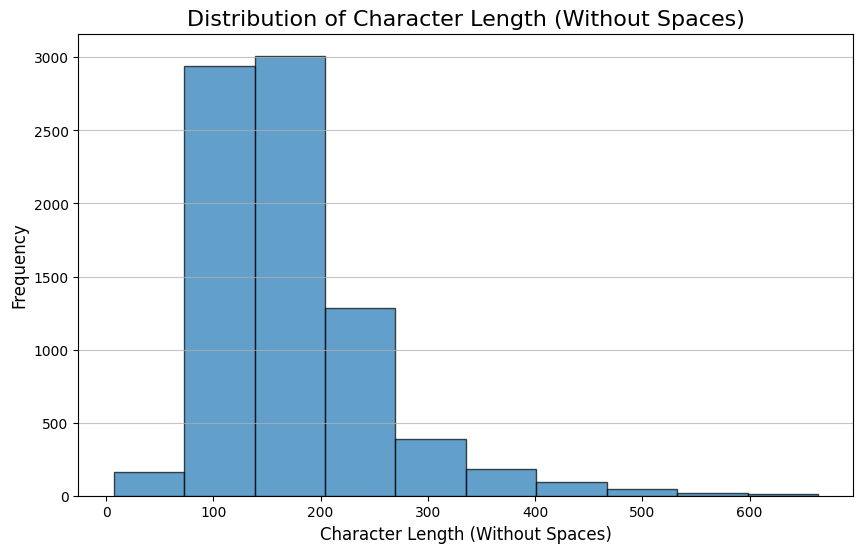

In [ ]:
import matplotlib.pyplot as plt
# 히스토그램으로 분포 시각화
plt.figure(figsize=(10, 6))
plt.hist(train['char_length_without_spaces'], bins=10, edgecolor='black', alpha=0.7)
plt.title('Distribution of Character Length (Without Spaces)', fontsize=16)
plt.xlabel('Character Length (Without Spaces)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.show()

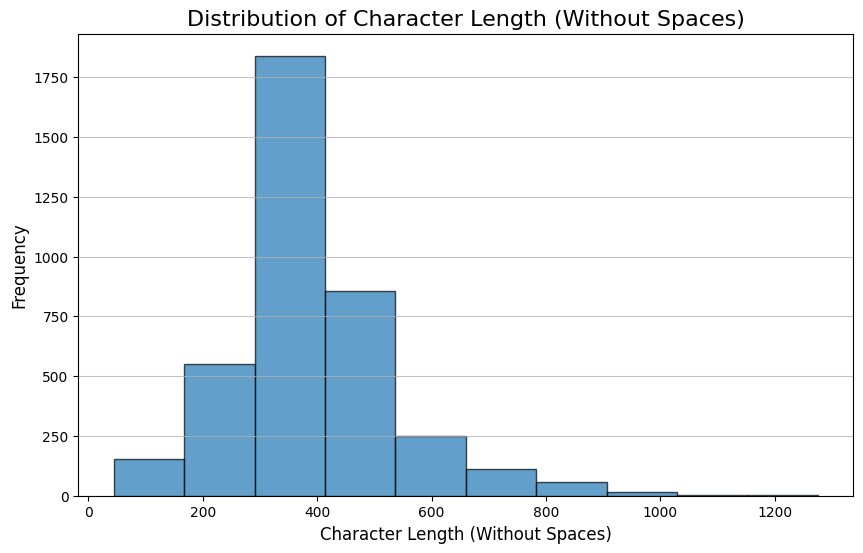

In [ ]:
import matplotlib.pyplot as plt
# 히스토그램으로 분포 시각화
plt.figure(figsize=(10, 6))
plt.hist(text['char_length_without_spaces'], bins=10, edgecolor='black', alpha=0.7)
plt.title('Distribution of Character Length (Without Spaces)', fontsize=16)
plt.xlabel('Character Length (Without Spaces)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.show()

In [ ]:
# text['char_length_without_spaces']가 600이상인 일반셋 전부 drop
text = text[text['char_length_without_spaces'] <= 600].reset_index(drop=True)
text

index    class  \
0      3929  meeting   
1      1532    daily   
2      1076    daily   
3       743    daily   
4       247    daily   
...     ...      ...   
3531   3842  general   
3532   3843  general   
3533   3844  general   
3534   3845  general   
3535   3846  general   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          오늘 meeting_info 가 있습니다. 회의 시간이 다 되어가나 아직 회의실에도착전이십니다.\n오늘 급한 사정으로 불참하는 걸로 변경할게. 전달해줘.\n네. 회의실에 전달해 드리겠습니다.   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               오늘은 진짜 잘먹었어.\n점심식사는 어떠셨습니까?\n매우 만족. \n그것 참 다행이네요.\n맛난 거 먹는 거만큼 행복한 것은 없지.\n저는 그것을 잘 몰라서 아쉽네요.\n미안해.\n괜찮아요. 행복하시면 됐어요.   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                오늘 날씨 어때?\n오후에는 비가 올 것으로 예상합니다.\n오후에 외출해야 하는데.\n우산은 있으신가요?\n있는데 비오면 밖에 있기 힘드니까 걱정이야.\n최대한 실내로 이동하세요.   
3                                                                                                                                                                                                                                                                                                                                                                                                          김미영 대표님. 오늘 점심식사는 어떠셨나요?\n오늘 점심은 직원들이랑 회사 앞 공원에서 김밥 포장해다가 먹었거든? 소풍 나온 것 같고 좋더라.\n오늘처럼 따뜻하고 미세먼지 낮은 날에 꼭 어울리는 선택이네요.\n응. 기분 전환되어서 좋았어. 다음에도 종종 이렇게 점심시간을 보내 봐야겠어.\n네. 좋은 생각입니다. 남은 오후 업무도 힘내서 마무리 하시길 바랍니다.   
4                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             내일부터 연휴 시작이야.\n계획이 있으세요?\n그냥 집에서 먹고 자고 하려고.\n오 그게 정말 쉬는거죠!\n그치? 벌써 신나.\n즐거운 연휴 보내고 오세요!   
...                                                                                                            

### train text 병합

In [ ]:
train['class'].value_counts()

class
기타 괴롭힘 대화      2188
협박 대화          2024
갈취 대화          1962
직장 내 괴롭힘 대화    1958
Name: count, dtype: int64

In [ ]:
train.tail()

idx  class  \
8127  NaN  협박 대화   
8128  NaN  협박 대화   
8129  NaN  협박 대화   
8130  NaN  협박 대화   
8131  NaN  협박 대화   

                                                                                                                                                                                                                                                                                                                                                                                                                             conversation  \
8127                                                                                                                                                                                      날때리지마\n아프니? 아프면참아.\n이미병원에충분히갔어.\n병원에갈거야? 죽어야해.\n뭐가문제야? 우리는가족인데.\n가족? 가족처럼말하네. 넌그냥내하인일뿐이야알지? 하인이널배신하면죽어야해. 다른방법이있어?\n내가틀렸어. 하지만창고말고는어디에도가본적이없어믿어.\n어떻게믿을수있어? 넌이미그계단을오르려고했잖아알지? 들어가는것과똑같잖아알지? 죽어야해.\n아니제발믿어. 난갈거야. 난네것을탐한적이없어.\n너는여전히입이좋아. 더맞아야해.   
8128                                                                                                                                                                                     오랜만이야. 여기네인질이있어\n좋아. 네형이무사히나온뒤에나중에이야기하자\n좋아? 이제네눈으로봤으니우리이야기를해볼까?\n네가날죽일수없는데에무슨원한이있어?\n그냥날보고싶지않아서내눈앞에서사라져\n내가사라진다고해서내가사라져야하는건아니야. 네가날아무리미워해도그건옳지않아.\n야그냥죽어야해. 내눈앞에서사라져\n사라지는게죽는게아니야. 죽어야해?\n응죽어야해. 이약먹고내눈앞에서사라져. 그러면기분이나아질거야.\n날구해줘. 제발. 나타나지않을게.   
8129                                                                                                                                                                                                                                                                                           선생님지금당신집이어디인지알아요.\n선생님제집에오지마세요.\n그럼제가말한대로하세요.\n어떻게할수있을까요.\n안되면부모님께전화해야겠어요.\n선생님제발.\n가족들얼굴도봐야해요.\n제발안돼요. 꼭볼게요.\n3일됐어요. 2일남았어요.\n네. 꼭볼게요. 제발   
8130                                                                                                                                                                                                                                      안녕하세요중고나라를통해연락드립니다.\n네아이폰을50만원에판매합니다.\n네입금했습니다.\n네택배로보내드리겠습니다.\n실례합니다택배가잘못된주소로왔나요? 아이폰이아니죠? 사기입니다.\n무슨말씀인지모르겠습니다.\n이사기꾼새끼야경찰에신고해서죽이기전에지금당장내돈을내놔.\n하고싶은대로해.\n경기도에사세요?\n어떻게알았어?\n지금당장가서죽여줄게. 기다려.   
8131  저는한국지검검사윤동철입니다. 박세미씨의계좌가현재범죄에연루되어있으니계좌번호를빨리제게알려주십시오.\n야보이스피싱하는거야? 말투나항상쓰는대본을바꿔. 왜항상똑같아? 누가속아?\n하. 농담이야? 웃어? 미쳤어. 내이름과전화번호를알면내집주소도알수있을거라고생각하지않니?\n뭐야? 너같은멍청이들이어떻게내집주소를알아내서약간사기를칠수있어? 네가하는말은다사기야.\n지금밖을봐. 검은색옷을입은사람들이많이보이니? 나를무시한대가를치르게될거야.\n뭐하는거야? 내정보를어떻게다알아? 이건불법이야!내가널신고하기전에그사람들을데려가.\n경찰에신고하지않으면내가먼저이길테니왜냉소적으로대하는거야?\n다시는그러지않을테니까이번만은그냥너무어가줘. 내가충분히못참더라도넌건드려서는안될걸건드렸어. 신장하나를제거할준비를해. 네목숨을살려주지않을거야. 이번만. 제발살려줘. 그러지않으면정말경찰에신고할거야.   

      char_length_without_spaces  
8127                         216  
8128                         221  
8129                         125  
8130                         178  
8131                         392

In [ ]:
# 일반대화셋 약 3800개
text['text'] = text['text'].apply(preprocess_for_kobert)

In [ ]:
text['idx'] = range(8081, 8081 + len(text))

In [ ]:
text['class'] = "일반"

In [ ]:
text['conversation'] = text['text']

In [ ]:
text = text.drop(columns=['index','text'])

In [ ]:
text

class  char_length_without_spaces    idx  \
0       일반                          86   8081   
1       일반                          91   8082   
2       일반                          79   8083   
3       일반                         156   8084   
4       일반                          67   8085   
...    ...                         ...    ...   
3531    일반                         417  11612   
3532    일반                         308  11613   
3533    일반                         293  11614   
3534    일반                         302  11615   
3535    일반                         280  11616   

                                                                                                                                                                                                                                                                                                                                                                                              conversation  
0                                                                                                                                                                                                                                                                                                               오늘meetinginfo가있습니다. 회의시간이다되어가나아직회의실에도착전이십니다.\n오늘급한사정으로불참하는걸로변경할게. 전달해줘.\n네. 회의실에전달해드리겠습니다.  
1                                                                                                                                                                                                                                                                                                      오늘은진짜잘먹었어.\n점심식사는어떠셨습니까?\n매우만족.\n그것참다행이네요.\n맛난거먹는거만큼행복한것은없지.\n저는그것을잘몰라서아쉽네요.\n미안해.\n괜찮아요. 행복하시면됐어요.  
2                                                                                                                                                                                                                                                                                                                     오늘날씨어때?\n오후에는비가올것으로예상합니다.\n오후에외출해야하는데.\n우산은있으신가요?\n있는데비오면밖에있기힘드니까걱정이야.\n최대한실내로이동하세요.  
3                                                                                                                                                                                                                                   김미영대표님. 오늘점심식사는어떠셨나요?\n오늘점심은직원들이랑회사앞공원에서김밥포장해다가먹었거든? 소풍나온것같고좋더라.\n오늘처럼따뜻하고미세먼지낮은날에꼭어울리는선택이네요.\n응. 기분전환되어서좋았어. 다음에도종종이렇게점심시간을보내봐야겠어.\n네. 좋은생각입니다. 남은오후업무도힘내서마무리하시길바랍니다.  
4                                                                                                                                                                                                                                                                                                                                내일부터연휴시작이야.\n계획이있으세요?\n그냥집에서먹고자고하려고.\n오그게정말쉬는거죠!\n그치? 벌써신나.\n즐거운연휴보내고오세요!  
...                                                                                                                                                                                                                                                                                                                                                                                                    ...  
3531  아니오징어게임때문에다른드라마도완전난리다?\n맞아!\n그유튜버중에누구지어쨌든외국나가서딱지치기하더라키키\n맞아맞아!키키\n한국드라마가흥행한다고나도뉴스로본거같아!\n갯마을차차차가전세계6위? 그렇다던데키키\n키키한국드라마재조명하면서뉴스기사뜨겠다\n오징어게임도아직도1위라고들었어\n오징어게임때문에한국드라마다찾아보나봐신기해.\n그한국식신파에다들눈물못참고난리던데키키k신파\n사람들이패러디하면서따라하는영상도봤는데웃기던데키키\n그뭐냐한소희나오는거그거지금난리더라\n알고있지만?\n마이네임!\n나그거봤어\n아니\n차차차가슬픈내용이니?\n아니었군키키\n나도안봐서몰라ㅠㅠ\n차차차는그냥시골에사는재밌는얘기!키키\n마이네임!\n맞아그거재밌?\n나는한소희알고있지만밖에몰랐는데키키다른게있었네\n그거재밌더라고액션도엄청나고강추!  
3532                                                                                                               최고의이슈는역시오징어닷.\n역시오징어게임달고나완전핫해\n우린. 깐부잖아.?\n오징어게임다들봤지?\n난봤어하하\n오징어게임난사실안봤어하하\n오일남할아버지가되게멋지덜\nㅠㅠ그때진짜슬펐는데할아버지죽는줄알고\n헉스포당했다!\n진짜반

In [ ]:
# 일반대화셋이랑 concat
data = pd.concat([train, text], ignore_index=True)

In [ ]:
data

idx      class  \
0          0.0      협박 대화   
1          1.0      협박 대화   
2          2.0  기타 괴롭힘 대화   
3          3.0      갈취 대화   
4          4.0      갈취 대화   
...        ...        ...   
11663  11612.0         일반   
11664  11613.0         일반   
11665  11614.0         일반   
11666  11615.0         일반   
11667  11616.0         일반   

                                                                                                                                                                                                                                                                                                                                                                                               conversation  \
0                                                                                                                                                                                           지금너스스로를죽여달라고애원하는것인가?\n아닙니다. 죄송합니다.\n죽을거면혼자죽지우리까지사건에휘말리게해? 진짜죽여버리고싶게.\n정말잘못했습니다.\n너가선택해. 너가죽을래네가족을죽여줄까.\n죄송합니다. 정말잘못했습니다.\n너에게는선택권이없어. 선택못한다면너와네가족까지모조리죽여버릴거야.\n선택못하겠습니다. 한번만도와주세요.\n그냥다죽여버려야겠군. 이의없지?\n제발도와주세요.   
1                                                                                                                                                                                                                                  길동경찰서입니다.\n9시40분마트에폭발물을설치할거다.\n네?\n똑바로들어한번만더얘기한다.\n장난전화걸지마시죠.\n9시40분마트에폭발물이터지면다죽는거야.\n장난전화는업무방해죄에해당됩니다.\n판단은너에게달려있다. 길동경찰서에도폭발물터지면꽤나재미있겠지.\n선생님진정하세요.\n난이야기했어. 경고했다는말이야.   
2                                                                                                                                                                                                             너되게귀여운거알지? 나보다작은남자는첨봤어.\n그만해. 니들놀리는거재미없어.\n지영아너가키160이지? 그럼재는160도안돼는거네?\n너군대도안가고좋겠다.\n니들이나작은데보태준거있냐?\n난쟁이들도장가가고하던데. 너도희망을가져봐\n더이상하지마라.\n그키크는수술도있대잖아? 니네엄마는그거안해주디?\n나람해줬어. 저키로어찌살아.\n제발그만괴롭히라고!   
3                                                                                                                                                                                                                                                                                                어이거기\n예??\n너말이야너. 이리오라고\n무슨일.\n너옷좋아보인다?\n얘돈좀있나봐\n아니에요. 돈없어요\n뒤져서나오면넌죽는다\n오늘피시방콜?\n콜. 마지막기회다. 있는거다내놔\n정말없어요   
4                 저기요혹시날이너무뜨겁잖아요? 저희회사에서이선크림파는데한번손등에발라보실래요?\n아진짜요? 안그래도선크림필요해서알아보던중인데한번발라볼게요!\n여기한번발라보세요. 진짜성분도좋고다좋아요.\n음. 성분이좋다고하셔서좋은거같기는한데제피부에맞지않나봐요. 피부가따끔거리네요.\n이번에진짜열심히연구해서만든건데피부가많이예민하신가봐요.\n네많이예민해요. 그럼많이파시고안녕히계세요.\n아니저기요돈안내요?\n네? 발라보는것도돈내야하나요?\n그럼이거누구한테팔아요? 당신이바른거를?\n아니먼저발라보시라고하셨잖아요. 먼저권유해놓고사라고강매하는거갈취인거몰라요?\n내가안사도된다고말한적있어? 그것도모르고바른걸누구탓하나? 빨리사당신이바른거당신이사야지\n진짜어이가없어서다른사람들한텐이렇게갈취하지마세요. 화딱지나네   
...                                                                                                                                                                                                                                                                                                                                                                                                     ...   
11663  아니오징어게임때문에다른드라마도완전난리다?\n맞아!\n그유튜버중에누구지어쨌든외국나가서딱지치기하더라키키\n맞아맞아!키키\n한국드라마가흥행한다고나도뉴스로본거같아!\n갯마을차차차가전세계6위? 그렇다던데키키\n키키한국드라마재조명하면서뉴스기사뜨겠다\n오징어게임도아직도1위라고들었어\n오징어게임때문에한국드라마다찾아보나봐신기해.\n그한국식신파에다들눈물못참고난리던데키키k신파\n사람들이패러디하면서따라하는영상도봤는데웃기던데키키\n그뭐냐한소희나오는거그거지금난리더라\n알고있지만?\n마이네임!\n나그거봤어\n아니\n차차차가슬픈내용이니?\n아니었군키키\n나도안봐서몰라ㅠㅠ\n차차차는그냥시골에사는재밌는얘기!키키\n마이네임!\n맞아그거재밌?\n나는한소희알고있지만밖에몰랐는데키키다른게있었네\n그거재밌더라고액션도엄청나고강추!   
11664                                                                                                               최고의이슈는역시오징어닷.\n역시오징어게임달고나완전핫해\n우린. 깐부잖아.?\n오징어게임다들봤지?\n난봤어하하\n오징어게임난사실안봤어하하\n오일남할아버지가되게멋지덜\nㅠㅠ그때진짜슬펐는데할아버지죽는줄알고\n헉스포당했다!\n진짜반전에반전. !\n근데요즘안봐도다본것처럼대화가능키키\n맞어\n짤로많이봤어하하\n그러니까키키달고나만으로이미통일\n너무많이말해가지고키키우리엄마도본척해.\n키키본척너무귀여우셔\n우리부모님도오징어게임보셨던데\n키키너희도어렸을때달고나만들었니?\n달고나난안만들것같애\n난만들어진거많이먹었어   
11665                                                                  

In [ ]:
data['class'].value_counts()

class
일반             3536
기타 괴롭힘 대화      2188
협박 대화          2024
갈취 대화          1962
직장 내 괴롭힘 대화    1958
Name: count, dtype: int64

In [ ]:
# data.to_csv("/content/drive/MyDrive/aiffel/Data/DLthon/train.csv",index=False,encoding='utf-8-sig')

In [ ]:
# job_titles = ['인턴', '사원', '부장', '대리', '과장', '주임', '팀장']

# # 대체 함수 정의
# def replace_job_titles(row):
#     if row['class'] != '기타 괴롭힘 대화':
#         for title in job_titles:
#             row['conversation'] = row['conversation'].replace(title, '[직책]')
#     return row

# # 데이터프레임에 함수 적용
# data = data.apply(replace_job_titles, axis=1)

# data

In [ ]:
data

idx      class  \
0          0.0      협박 대화   
1          1.0      협박 대화   
2          2.0  기타 괴롭힘 대화   
3          3.0      갈취 대화   
4          4.0      갈취 대화   
...        ...        ...   
11663  11612.0         일반   
11664  11613.0         일반   
11665  11614.0         일반   
11666  11615.0         일반   
11667  11616.0         일반   

                                                                                                                                                                                                                                                                                                                                                                                               conversation  \
0                                                                                                                                                                                           지금너스스로를죽여달라고애원하는것인가?\n아닙니다. 죄송합니다.\n죽을거면혼자죽지우리까지사건에휘말리게해? 진짜죽여버리고싶게.\n정말잘못했습니다.\n너가선택해. 너가죽을래네가족을죽여줄까.\n죄송합니다. 정말잘못했습니다.\n너에게는선택권이없어. 선택못한다면너와네가족까지모조리죽여버릴거야.\n선택못하겠습니다. 한번만도와주세요.\n그냥다죽여버려야겠군. 이의없지?\n제발도와주세요.   
1                                                                                                                                                                                                                                  길동경찰서입니다.\n9시40분마트에폭발물을설치할거다.\n네?\n똑바로들어한번만더얘기한다.\n장난전화걸지마시죠.\n9시40분마트에폭발물이터지면다죽는거야.\n장난전화는업무방해죄에해당됩니다.\n판단은너에게달려있다. 길동경찰서에도폭발물터지면꽤나재미있겠지.\n선생님진정하세요.\n난이야기했어. 경고했다는말이야.   
2                                                                                                                                                                                                             너되게귀여운거알지? 나보다작은남자는첨봤어.\n그만해. 니들놀리는거재미없어.\n지영아너가키160이지? 그럼재는160도안돼는거네?\n너군대도안가고좋겠다.\n니들이나작은데보태준거있냐?\n난쟁이들도장가가고하던데. 너도희망을가져봐\n더이상하지마라.\n그키크는수술도있대잖아? 니네엄마는그거안해주디?\n나람해줬어. 저키로어찌살아.\n제발그만괴롭히라고!   
3                                                                                                                                                                                                                                                                                                어이거기\n예??\n너말이야너. 이리오라고\n무슨일.\n너옷좋아보인다?\n얘돈좀있나봐\n아니에요. 돈없어요\n뒤져서나오면넌죽는다\n오늘피시방콜?\n콜. 마지막기회다. 있는거다내놔\n정말없어요   
4                 저기요혹시날이너무뜨겁잖아요? 저희회사에서이선크림파는데한번손등에발라보실래요?\n아진짜요? 안그래도선크림필요해서알아보던중인데한번발라볼게요!\n여기한번발라보세요. 진짜성분도좋고다좋아요.\n음. 성분이좋다고하셔서좋은거같기는한데제피부에맞지않나봐요. 피부가따끔거리네요.\n이번에진짜열심히연구해서만든건데피부가많이예민하신가봐요.\n네많이예민해요. 그럼많이파시고안녕히계세요.\n아니저기요돈안내요?\n네? 발라보는것도돈내야하나요?\n그럼이거누구한테팔아요? 당신이바른거를?\n아니먼저발라보시라고하셨잖아요. 먼저권유해놓고사라고강매하는거갈취인거몰라요?\n내가안사도된다고말한적있어? 그것도모르고바른걸누구탓하나? 빨리사당신이바른거당신이사야지\n진짜어이가없어서다른사람들한텐이렇게갈취하지마세요. 화딱지나네   
...                                                                                                                                                                                                                                                                                                                                                                                                     ...   
11663  아니오징어게임때문에다른드라마도완전난리다?\n맞아!\n그유튜버중에누구지어쨌든외국나가서딱지치기하더라키키\n맞아맞아!키키\n한국드라마가흥행한다고나도뉴스로본거같아!\n갯마을차차차가전세계6위? 그렇다던데키키\n키키한국드라마재조명하면서뉴스기사뜨겠다\n오징어게임도아직도1위라고들었어\n오징어게임때문에한국드라마다찾아보나봐신기해.\n그한국식신파에다들눈물못참고난리던데키키k신파\n사람들이패러디하면서따라하는영상도봤는데웃기던데키키\n그뭐냐한소희나오는거그거지금난리더라\n알고있지만?\n마이네임!\n나그거봤어\n아니\n차차차가슬픈내용이니?\n아니었군키키\n나도안봐서몰라ㅠㅠ\n차차차는그냥시골에사는재밌는얘기!키키\n마이네임!\n맞아그거재밌?\n나는한소희알고있지만밖에몰랐는데키키다른게있었네\n그거재밌더라고액션도엄청나고강추!   
11664                                                                                                               최고의이슈는역시오징어닷.\n역시오징어게임달고나완전핫해\n우린. 깐부잖아.?\n오징어게임다들봤지?\n난봤어하하\n오징어게임난사실안봤어하하\n오일남할아버지가되게멋지덜\nㅠㅠ그때진짜슬펐는데할아버지죽는줄알고\n헉스포당했다!\n진짜반전에반전. !\n근데요즘안봐도다본것처럼대화가능키키\n맞어\n짤로많이봤어하하\n그러니까키키달고나만으로이미통일\n너무많이말해가지고키키우리엄마도본척해.\n키키본척너무귀여우셔\n우리부모님도오징어게임보셨던데\n키키너희도어렸을때달고나만들었니?\n달고나난안만들것같애\n난만들어진거많이먹었어   
11665                                                                  

In [ ]:
test

idx  \
0    t_000   
1    t_001   
2    t_002   
3    t_003   
4    t_004   
..     ...   
495  t_495   
496  t_496   
497  t_497   
498  t_498   
499  t_499   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      text  
0                                                                                                                                                                                                                                                                                                                                                                                           아가씨 담배한갑주소 네 4500원입니다 어 네 지갑어디갔지 에이 버스에서 잃어버렸나보네 그럼 취소할까요 아가씨 내 여기단골이니 담에 갖다줄께 저도 알바생이라 외상안됩니다 아따 누가 떼먹는다고 그러나 갖다준다고 안됩니다 자꾸이럼 경찰불러요 아가씨 담배피는교 그건 왜 물으세요 그람 아가씨 담배 한대만 빌립시다 내 지금 지갑도 잃어버리고 기분이 그래서 그러니 여기요  아따 주는김에 한개더 주면 되겠네  
1                                                                                                                                                                                                                                                                                                                                      우리팀에서 다른팀으로 갈 사람 없나? 그럼 영지씨가 가는건 어때?  네? 제가요? 그렇지? 2달만 파견 잘 갔다오면 승진이야. 네? 저는 별로 가고 싶지 않습니다. 여기 있는 모든사람도 가기 싫어해. 그러니까 막내인 영지씨가 가는게 맞지 정말 죄송합니다. 저는 못갑니다. 장난해? 모두를 위해 영지씨가 희생하는게 싫어? 네. 부당한 방법으로 가는 것 같습니다. 영지씨 안가면 회사생활 오래 못할 것 같은데 그래도 안갈거야? 안가면 지옥일텐데. 그래도 이 방법은 아닌 것 같습니다. 죄송합니다.  
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               너 오늘 그게 뭐야 네 제가 뭘 잘못했나요.? 제대로 좀 하지 네 똑바로 좀 하지 행실이 맘에 안들어 네 실천할께요 옆에 동기들 좀 본받으란 말야 어? 네 알겠습니다 그래 똑바로해 노럭할께요  
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         이거 들어바 와 이 노래 진짜 좋다 그치 요즘 이 것만 들어 진짜 너무 좋다 내가 요즘 듣는 것도 들어봐 음 난 좀 별론데 좋을 줄 알았는데 아쉽네 내 취향은 아닌 듯 배고프다 밥이나 먹으러 가자 그래  
4                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 아무튼 앞으로 니가 내 와이파이야. .응 와이파이 온. 켰어. 반말? 주인님이라고도 말해야지? .켰습니다. 주인님. 오냐. 앞으로도 잘부탁한다 와이파이. 넵. 이렇게만 해? 알겠지? 응.  
..                                                                                                                                                                                                              

### klue/roberta-base

In [ ]:
!pip install transformers
!pip install torch

In [ ]:
data['class'].unique()

array(['협박 대화', '기타 괴롭힘 대화', '갈취 대화', '직장 내 괴롭힘 대화', '일반'], dtype=object)

In [ ]:
# 클래스별 20%를 Validation으로 추출
val = data.groupby('class', group_keys=False).apply(lambda x: x.sample(frac=0.2, random_state=2024))

# 나머지를 Train으로 설정
train = data.drop(val.index).reset_index(drop=True)

# Validation도 Reset Index 적용
val = val.reset_index(drop=True)

<ipython-input-61-23c1c91b175d>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  val = data.groupby('class', group_keys=False).apply(lambda x: x.sample(frac=0.2, random_state=2024))


In [ ]:
data['class'].value_counts()

class
일반             3536
기타 괴롭힘 대화      2188
협박 대화          2024
갈취 대화          1962
직장 내 괴롭힘 대화    1958
Name: count, dtype: int64

In [ ]:
train['class'].value_counts()

class
일반             2829
기타 괴롭힘 대화      1750
협박 대화          1619
갈취 대화          1570
직장 내 괴롭힘 대화    1566
Name: count, dtype: int64

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModel
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
# all_sentences = train['conversation'].tolist() + test['text'].tolist()

# # 각 문장의 토큰 개수를 계산하는 함수
# def find_max_len(sentences, tokenizer):
#     # 모든 문장을 토큰화하고 토큰 개수를 구함
#     token_lengths = [len(tokenizer.encode(sentence, truncation=False)) for sentence in sentences]
#     max_length = max(token_lengths)
#     return max_length

# # max_len 구하기
# max_len = find_max_len(all_sentences, tokenizer)
# print(f"Max Length: {max_len}")

### 대충 300~400몇개

In [ ]:
import torch
torch.cuda.empty_cache()

In [ ]:
128*3+64

448

In [ ]:
# 한국어 RoBERTa 토크나이저 및 모델 로드
tokenizer = AutoTokenizer.from_pretrained('klue/roberta-base')
# model = AutoModel.from_pretrained('klue/roberta-base')
model = AutoModel.from_pretrained('klue/roberta-base', torch_dtype=torch.float16)
# 로버타 모델 로드 및 프리징 설정
# 마지막 두 개의 레이어만 학습하고 나머지는 프리징하는 방법

# 파인튜닝
# 전반적인 학습은 로버타셋에서 + 상위 layer 열고 train 데이터셋으로 학습
# for name, param in model.named_parameters():
#     if "layer.9" in name or "layer.10" in name or "layer.11" in name:
#         param.requires_grad = True  # 상위 세 개 레이어 학습 가능하게
#     else:
#         param.requires_grad = False  # 나머지 레이어는 프리징

# GPU 무조건
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# 토큰화, 인코딩, 패딩
# 더 명확한 max_len 설정이 필요#
# 서브워드 토큰은 공백으로 나눈 토큰보다 더 보수적으로 잡아야
def encode_sentences(sentences, tokenizer, max_len=410):
    encoded_dict = tokenizer(
        sentences,
        padding=True,
        truncation=True,
        return_tensors='pt',
        max_length=max_len
    )
    return encoded_dict

# conversation columns 토큰화 및 인코딩
train_sentences = train['conversation'].tolist()
val_sentences = val['conversation'].tolist()

train_encoded = encode_sentences(train_sentences, tokenizer)
val_encoded = encode_sentences(val_sentences, tokenizer)

# TensorDataset을 생성하여 DataLoader 배치 생성
train_dataset = TensorDataset(train_encoded['input_ids'], train_encoded['attention_mask'])
val_dataset = TensorDataset(val_encoded['input_ids'], val_encoded['attention_mask'])

train_loader = DataLoader(train_dataset, batch_size=4)  # 배치 크기 조정
val_loader = DataLoader(val_dataset, batch_size=4)      # 4 이상으로 넣으면 메모리 터져서 셀 죽음

# 배치 간 모델 임베딩 진행
train_embeddings_list = []
val_embeddings_list = []

with torch.no_grad():
    model.eval()  # 평가 모드 학습 X

    for batch in train_loader:
        input_ids, attention_mask = [b.to(device) for b in batch]  # GPU로 이동
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        train_embeddings_list.append(outputs.last_hidden_state)  # GPU 상태 유지

    for batch in val_loader:
        input_ids, attention_mask = [b.to(device) for b in batch]  # GPU로 이동
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        val_embeddings_list.append(outputs.last_hidden_state)  # GPU 상태 유지

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of RobertaModel were not initialized from the model checkpoint at klue/roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# 배치로 나눴던 임베딩 결과 병ㅂ합
train_embeddings = torch.cat(train_embeddings_list, dim=0)
val_embeddings = torch.cat(val_embeddings_list, dim=0)

# 결과는 CPU로 출력
print("Train[0] 임베딩 벡터:", train_embeddings[0].to('cpu'))
print("Validation[0] 임베딩 벡터:", val_embeddings[0].to('cpu'))

Train[0] 임베딩 벡터: tensor([[ 0.0530, -0.5874, -0.2058,  ..., -0.1282, -0.1199, -0.0170],
        [-0.4880, -0.6797,  0.5845,  ...,  0.2827, -0.3696,  0.5659],
        [-0.1650, -0.2969,  0.6323,  ...,  0.2122,  0.2041,  0.0818],
        ...,
        [-0.6025, -0.6709, -0.4263,  ..., -0.0648, -0.1992, -0.2837],
        [-0.6025, -0.6709, -0.4263,  ..., -0.0648, -0.1992, -0.2837],
        [-0.6025, -0.6709, -0.4263,  ..., -0.0648, -0.1992, -0.2837]],
       dtype=torch.float16)
Validation[0] 임베딩 벡터: tensor([[ 0.1086, -0.6777, -0.3162,  ..., -0.2183, -0.1098,  0.0520],
        [-0.2150, -0.6118,  0.3542,  ...,  0.0995, -0.0739, -0.1260],
        [ 0.3879, -0.5088,  0.3889,  ..., -0.4248, -0.3582,  0.2659],
        ...,
        [-0.4868, -0.3901, -0.8530,  ..., -0.2844, -0.1372, -0.1448],
        [-0.4868, -0.3901, -0.8530,  ..., -0.2844, -0.1372, -0.1448],
        [-0.4868, -0.3901, -0.8530,  ..., -0.2844, -0.1372, -0.1448]],
       dtype=torch.float16)


In [ ]:
train_labels = train['class']
val_labels = val['class']

# 분류가 목적이니까 target 레이블인코딩
from sklearn.preprocessing import LabelEncoder

# LabelEncoder 초기화 및 클래스 레이블 인코딩
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
val_labels_encoded = label_encoder.transform(val_labels)

class_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("레이블 인코딩:", class_mapping)

레이블 인코딩: {'갈취 대화': 0, '기타 괴롭힘 대화': 1, '일반': 2, '직장 내 괴롭힘 대화': 3, '협박 대화': 4}


In [ ]:
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import f1_score

# 라벨 텐서로 변환 + GPU 이동
train_labels_tensor = torch.tensor(train_labels_encoded, dtype=torch.long).to(device)
val_labels_tensor = torch.tensor(val_labels_encoded, dtype=torch.long).to(device)

# 병합했던 임베딩 데이터
train_data = train_embeddings.mean(dim=1)
val_data = val_embeddings.mean(dim=1)

# DataLoader로 다시 나누고 배치생성
train_dataset = TensorDataset(train_data, train_labels_tensor)
# train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)  # 배치 크기는 싹 다 동일하게
val_dataset = TensorDataset(val_data, val_labels_tensor)
# val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False)

# 마지막 셀 버리기
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True, drop_last=True)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False, drop_last=True)


# TransformerClassifier 정의
class TransformerClassifier(nn.Module):
    def __init__(self, input_dim, num_labels, n_heads=8, n_layers=2, embedding_dim=256):
        super(TransformerClassifier, self).__init__()
        self.embedding = nn.Linear(input_dim, embedding_dim)  # 임베딩 차원을 256으로 변경
        encoder_layer = nn.TransformerEncoderLayer(d_model=embedding_dim, nhead=n_heads, batch_first=True)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=n_layers)
        self.fc = nn.Linear(embedding_dim, num_labels)  # 출력 레이어

    def forward(self, x):
        x = self.embedding(x)  # Input을 임베딩
        x = self.transformer(x.unsqueeze(1)).squeeze(1)  # Transformer에 입력
        x = self.fc(x)  # 최종 출력
        return x

# 분류 모델 선언
input_dim = train_data.shape[1]
num_labels = len(label_encoder.classes_)
classifier = TransformerClassifier(input_dim, num_labels).to(device)
classifier = classifier.float()  # 모델을 float32로 설정

# 손실 함수 & 옵티마이저
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(classifier.parameters(), lr=1e-4)

# 모델 학습 & 최고 가중치 저장
num_epochs = 30
best_val_loss = float('inf')
best_model_path = "/content/drive/MyDrive/aiffel/Data/DLthon/model/best_classifier_model2.pth"

for epoch in range(num_epochs):
    classifier.train()
    total_train_loss = 0

    for batch in train_loader:
        batch_data, batch_labels = [b.to(device) for b in batch]
        batch_data = batch_data.float()  # 데이터를 float32로 변환
        optimizer.zero_grad()

        # Forward pass
        outputs = classifier(batch_data)
        loss = criterion(outputs, batch_labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        total_train_loss += loss.item()

    # 평가
    classifier.eval()
    total_val_loss = 0
    all_val_preds = []
    all_val_labels = []

    with torch.no_grad():
        for batch in val_loader:
            batch_data, batch_labels = [b.to(device) for b in batch]
            batch_data = batch_data.float()  # 데이터를 float32로 변환
            val_outputs = classifier(batch_data)
            val_loss = criterion(val_outputs, batch_labels)

            total_val_loss += val_loss.item()
            all_val_preds.extend(torch.argmax(val_outputs, dim=1).cpu().numpy())
            all_val_labels.extend(batch_labels.cpu().numpy())

    avg_train_loss = total_train_loss / len(train_loader)
    avg_val_loss = total_val_loss / len(val_loader)

    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss}, Val Loss: {avg_val_loss}")

    # 가중치 저장
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        torch.save(classifier.state_dict(), best_model_path)
        print(f"Best model saved at epoch {epoch+1} with validation loss: {best_val_loss}")

# F1 스코어
f1 = f1_score(all_val_labels, all_val_preds, average='weighted')
print(f"Final Validation F1 Score: {f1}")

KeyboardInterrupt: 

In [ ]:
# # 테스트 데이터 전처리 및 임베딩
# test_sentences = test['text'].tolist()
# test_encoded = encode_sentences(test_sentences, tokenizer)

# # DataLoader로 배치화
# test_dataset = TensorDataset(
#     test_encoded['input_ids'].to(device),  # GPU로 이동
#     test_encoded['attention_mask'].to(device)  # GPU로 이동
# )
# test_loader = DataLoader(test_dataset, batch_size=8)

# # 모델을 사용하여 배치 단위로 임베딩 계산
# test_data_list = []  # 결과를 저장할 리스트

# # 모델 장치 이동 확인
# model = model.to(device)

# with torch.no_grad():
#     model.eval()  # 평가 모드
#     for batch in test_loader:
#         # 배치 데이터는 이미 GPU에 있음
#         input_ids, attention_mask = batch

#         # 모델 출력 계산
#         outputs = model(input_ids=input_ids, attention_mask=attention_mask)

#         # 마지막 히든 상태를 배치 평균 계산 후 CPU로 이동
#         batch_mean = outputs.last_hidden_state.mean(dim=1).cpu().float()
#         test_data_list.append(batch_mean)

# # 배치별 평균 결과 병합
# test_data = torch.cat(test_data_list, dim=0)  # 최종적으로 하나의 텐서로 병합

In [ ]:
# 테스트 데이터 전처리 및 임베딩
test_sentences = test['text'].tolist()
test_encoded = encode_sentences(test_sentences, tokenizer)

# DataLoader로 배치화
test_dataset = TensorDataset(test_encoded['input_ids'], test_encoded['attention_mask'])
test_loader = DataLoader(test_dataset, batch_size=8)

# 모델을 사용하여 배치 단위로 임베딩 계산 및 CPU에서 처리
test_data_list = []  # 결과를 저장할 리스트

with torch.no_grad():
    model.eval()  # 평가 모드
    for batch in test_loader:
        # 입력 데이터를 GPU로 이동
        input_ids, attention_mask = [b.to(device) for b in batch]

        # 모델 출력 계산
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)

        # 마지막 히든 상태를 배치 평균 계산 후 CPU로 이동
        batch_mean = outputs.last_hidden_state.mean(dim=1).cpu().float()
        test_data_list.append(batch_mean)


# 배치별 평균 결과 병합
test_data = torch.cat(test_data_list, dim=0)  # 최종적으로 하나의 텐서로 병합

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cpu and cuda:0! (when checking argument for argument index in method wrapper_CUDA__index_select)

In [ ]:
# 테스트 데이터에 대해 클래스 예측 수행
all_test_preds = []
test_dataset = TensorDataset(test_data)  # attention mask는 불필요함
test_loader = DataLoader(test_dataset, batch_size=8)

classifier.eval()
with torch.no_grad():
    for batch in test_loader:
        batch_data = batch[0].to(device).float()  # 데이터 텐서에 맞게 Float로
        outputs = classifier(batch_data)
        preds = torch.argmax(outputs, dim=1).cpu().numpy()
        all_test_preds.extend(preds)

# 예측된 클래스 출력
test['predicted_class'] = label_encoder.inverse_transform(all_test_preds)
print(test[['text', 'predicted_class']])

In [ ]:
sub['class'] = test['predicted_class']
sub['class'].value_counts()

In [ ]:
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import f1_score

# 텐서로 변환 + GPU 이동
train_labels_tensor = torch.tensor(train_labels_encoded, dtype=torch.long).to(device)
val_labels_tensor = torch.tensor(val_labels_encoded, dtype=torch.long).to(device)

# 임베딩
train_data = train_embeddings.mean(dim=1)
val_data = val_embeddings.mean(dim=1)

# DataLoader 생성 배치 생성
train_dataset = TensorDataset(train_data, train_labels_tensor)
# train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)  # 배치 크기는 싹 다 동일하게
val_dataset = TensorDataset(val_data, val_labels_tensor)
# val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True, drop_last=True)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False, drop_last=True)

# 분류기 로지스틱 말고는?
# class Classifier(nn.Module):
#     def __init__(self, input_dim, num_labels):
#         super(Classifier, self).__init__()
#         self.fc1 = nn.Linear(input_dim, 256)  # layer1
#         self.batch_norm1 = nn.BatchNorm1d(256)  # Batch Normalization
#         self.leaky_relu = nn.LeakyReLU()  # Leaky ReLU 추가
#         self.dropout1 = nn.Dropout(0.25)  # 첫 번째 드롭아웃

#         self.fc2 = nn.Linear(256, 128)  # layer2
#         self.batch_norm2 = nn.BatchNorm1d(128)  # Batch Normalization
#         self.leaky_relu2 = nn.LeakyReLU()  # 두 번째 Leaky ReLU 추가
#         self.dropout2 = nn.Dropout(0.25)  # 두 번째 드롭아웃

#         self.fc3 = nn.Linear(128, num_labels)  # 출력 차원 조정?

#     def forward(self, x):
#         # layer1
#         x = self.fc1(x)
#         x = self.batch_norm1(x)
#         x = self.leaky_relu(x)
#         x = self.dropout1(x)

#         # layer 2
#         x = self.fc2(x)
#         x = self.batch_norm2(x)
#         x = self.leaky_relu2(x)
#         x = self.dropout2(x)

#         # 출력
#         x = self.fc3(x)

#         return x

# 배치정규화
class Classifier(nn.Module):
    def __init__(self, input_dim, num_labels):
        super(Classifier, self).__init__()
        self.fc1 = nn.Linear(input_dim, 512)
        self.batch_norm1 = nn.BatchNorm1d(512)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.3)

        self.fc2 = nn.Linear(512, 256)
        self.batch_norm2 = nn.BatchNorm1d(256)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.3)

        self.fc3 = nn.Linear(256, 128)
        self.batch_norm3 = nn.BatchNorm1d(128)
        self.relu3 = nn.ReLU()
        self.dropout3 = nn.Dropout(0.3)

        self.fc4 = nn.Linear(128, num_labels)

    def forward(self, x):
        x = self.dropout1(self.relu1(self.batch_norm1(self.fc1(x))))
        x = self.dropout2(self.relu2(self.batch_norm2(self.fc2(x))))
        x = self.dropout3(self.relu3(self.batch_norm3(self.fc3(x))))
        x = self.fc4(x)
        return x


# # layer 정규화
# class Classifier(nn.Module):
#     def __init__(self, input_dim, num_labels):
#         super(Classifier, self).__init__()
#         self.fc1 = nn.Linear(input_dim, 256)
#         self.layer_norm1 = nn.LayerNorm(256)  # Layer Normalization
#         self.relu1 = nn.ReLU()
#         self.dropout1 = nn.Dropout(0.3)

#         self.fc2 = nn.Linear(256, 128)
#         self.layer_norm2 = nn.LayerNorm(128)  # Layer Normalization
#         self.relu2 = nn.ReLU()
#         self.dropout2 = nn.Dropout(0.3)

#         self.fc3 = nn.Linear(128, 64)
#         self.layer_norm3 = nn.LayerNorm(64)  # Layer Normalization
#         self.relu3 = nn.ReLU()
#         self.dropout3 = nn.Dropout(0.3)

#         self.fc4 = nn.Linear(64, num_labels)

#     def forward(self, x):
#         x = self.dropout1(self.relu1(self.layer_norm1(self.fc1(x))))
#         x = self.dropout2(self.relu2(self.layer_norm2(self.fc2(x))))
#         x = self.dropout3(self.relu3(self.layer_norm3(self.fc3(x))))
#         x = self.fc4(x)
#         return x



# 분류 모델 선언  첫 번째 확률
input_dim = train_data.shape[1]
num_labels = len(label_encoder.classes_)
classifier = Classifier(input_dim, num_labels).to(device)

# float 다시 32로

classifier.float()
# 손실 함수 & 옵티마이저
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(classifier.parameters(), lr=1e-4) # lr 0.0001

# # 파인튜닝 옵티마이저
# optimizer = optim.Adam(
#     filter(lambda p: p.requires_grad, model.parameters()),
#     lr=1e-4,
#     weight_decay=1e-2
# )

# 모델 학습 & 최고 가중치 저장
num_epochs = 40
best_val_loss = float('inf')
best_model_path = "/content/drive/MyDrive/aiffel/Data/DLthon/model/best_classifier_model2.pth"

for epoch in range(num_epochs):
    classifier.train()
    total_train_loss = 0

    for batch in train_loader:
        batch_data, batch_labels = [b.to(device) for b in batch]
        batch_data = batch_data.float()  # float32로 변환
        optimizer.zero_grad()

        outputs = classifier(batch_data)
        loss = criterion(outputs, batch_labels)
        loss.backward()
        optimizer.step()

        total_train_loss += loss.item()

    # 평가
    classifier.eval()
    total_val_loss = 0
    all_val_preds = []
    all_val_labels = []

    with torch.no_grad():
        for batch in val_loader:
            batch_data, batch_labels = [b.to(device) for b in batch]
            batch_data = batch_data.float()  # float32로 변환
            val_outputs = classifier(batch_data)
            val_loss = criterion(val_outputs, batch_labels)

            total_val_loss += val_loss.item()
            all_val_preds.extend(torch.argmax(val_outputs, dim=1).cpu().numpy())
            all_val_labels.extend(batch_labels.cpu().numpy())

    avg_train_loss = total_train_loss / len(train_loader)
    avg_val_loss = total_val_loss / len(val_loader)

    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss}, Val Loss: {avg_val_loss}")

    # 가중치 저장
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        torch.save(classifier.state_dict(), best_model_path)
        print(f"Best model saved at epoch {epoch+1} with validation loss: {best_val_loss}")

# F1 스코어
f1 = f1_score(all_val_labels, all_val_preds, average='weighted')
print(f"Final Validation F1 Score: {f1}")

Epoch [1/40], Train Loss: 0.9685764628403387, Val Loss: 0.5799189327521524
Best model saved at epoch 1 with validation loss: 0.5799189327521524
Epoch [2/40], Train Loss: 0.6622063056094569, Val Loss: 0.46743323601449477
Best model saved at epoch 2 with validation loss: 0.46743323601449477
Epoch [3/40], Train Loss: 0.5920063839078359, Val Loss: 0.46175480869525076
Best model saved at epoch 3 with validation loss: 0.46175480869525076
Epoch [4/40], Train Loss: 0.5474340487367395, Val Loss: 0.4273490815189798
Best model saved at epoch 4 with validation loss: 0.4273490815189798
Epoch [5/40], Train Loss: 0.5241191909739533, Val Loss: 0.38445162694401963
Best model saved at epoch 5 with validation loss: 0.38445162694401963
Epoch [6/40], Train Loss: 0.4926257800649513, Val Loss: 0.3969414016180688
Epoch [7/40], Train Loss: 0.47517899277829284, Val Loss: 0.38566491450103085
Epoch [8/40], Train Loss: 0.474945217134562, Val Loss: 0.347757137537361
Best model saved at epoch 8 with validation loss:

In [ ]:
# 테스트 데이터 전처리 및 임베딩
test_sentences = test['text'].tolist()
test_encoded = encode_sentences(test_sentences, tokenizer)

# DataLoader로 배치화
test_dataset = TensorDataset(test_encoded['input_ids'], test_encoded['attention_mask'])
test_loader = DataLoader(test_dataset, batch_size=8)

# 모델을 사용하여 배치 단위로 임베딩 계산 및 CPU에서 처리
test_data_list = []  # 결과를 저장할 리스트

with torch.no_grad():
    model.eval()  # 평가 모드
    for batch in test_loader:
        # 입력 데이터를 GPU로 이동
        input_ids, attention_mask = [b.to(device) for b in batch]

        # 모델 출력 계산
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)

        # 마지막 히든 상태를 배치 평균 계산 후 CPU로 이동
        batch_mean = outputs.last_hidden_state.mean(dim=1).cpu().float()
        test_data_list.append(batch_mean)

# 배치별 평균 결과 병합
test_data = torch.cat(test_data_list, dim=0)  # 최종적으로 하나의 텐서로 병합

In [ ]:
# 테스트 데이터에 대해 클래스 예측 수행
all_test_preds = []
test_dataset = TensorDataset(test_data)  # attention mask는 불필요함
test_loader = DataLoader(test_dataset, batch_size=8)

classifier.eval()
with torch.no_grad():
    for batch in test_loader:
        batch_data = batch[0].to(device).float()  # 데이터 텐서에 맞게 Float로
        outputs = classifier(batch_data)
        preds = torch.argmax(outputs, dim=1).cpu().numpy()
        all_test_preds.extend(preds)

# 예측된 클래스 출력
test['predicted_class'] = label_encoder.inverse_transform(all_test_preds)
test[['text', 'predicted_class']]

text  \
0                                                                                                                                                                                                                                                                                                                                                                                           아가씨 담배한갑주소 네 4500원입니다 어 네 지갑어디갔지 에이 버스에서 잃어버렸나보네 그럼 취소할까요 아가씨 내 여기단골이니 담에 갖다줄께 저도 알바생이라 외상안됩니다 아따 누가 떼먹는다고 그러나 갖다준다고 안됩니다 자꾸이럼 경찰불러요 아가씨 담배피는교 그건 왜 물으세요 그람 아가씨 담배 한대만 빌립시다 내 지금 지갑도 잃어버리고 기분이 그래서 그러니 여기요  아따 주는김에 한개더 주면 되겠네   
1                                                                                                                                                                                                                                                                                                                                      우리팀에서 다른팀으로 갈 사람 없나? 그럼 영지씨가 가는건 어때?  네? 제가요? 그렇지? 2달만 파견 잘 갔다오면 승진이야. 네? 저는 별로 가고 싶지 않습니다. 여기 있는 모든사람도 가기 싫어해. 그러니까 막내인 영지씨가 가는게 맞지 정말 죄송합니다. 저는 못갑니다. 장난해? 모두를 위해 영지씨가 희생하는게 싫어? 네. 부당한 방법으로 가는 것 같습니다. 영지씨 안가면 회사생활 오래 못할 것 같은데 그래도 안갈거야? 안가면 지옥일텐데. 그래도 이 방법은 아닌 것 같습니다. 죄송합니다.   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               너 오늘 그게 뭐야 네 제가 뭘 잘못했나요.? 제대로 좀 하지 네 똑바로 좀 하지 행실이 맘에 안들어 네 실천할께요 옆에 동기들 좀 본받으란 말야 어? 네 알겠습니다 그래 똑바로해 노럭할께요   
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         이거 들어바 와 이 노래 진짜 좋다 그치 요즘 이 것만 들어 진짜 너무 좋다 내가 요즘 듣는 것도 들어봐 음 난 좀 별론데 좋을 줄 알았는데 아쉽네 내 취향은 아닌 듯 배고프다 밥이나 먹으러 가자 그래   
4                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 아무튼 앞으로 니가 내 와이파이야. .응 와이파이 온. 켰어. 반말? 주인님이라고도 말해야지? .켰습니다. 주인님. 오냐. 앞으로도 잘부탁한다 와이파이. 넵. 이렇게만 해? 알겠지? 응.   
..                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     ...   
495                                                                                                                                                                                                                                                                                                                                                                 

In [ ]:
test['predicted_class']

0            갈취 대화
1      직장 내 괴롭힘 대화
2        기타 괴롭힘 대화
3        기타 괴롭힘 대화
4        기타 괴롭힘 대화
          ...     
495    직장 내 괴롭힘 대화
496    직장 내 괴롭힘 대화
497          갈취 대화
498    직장 내 괴롭힘 대화
499          협박 대화
Name: predicted_class, Length: 500, dtype: object

In [ ]:
sub['class'] = test['predicted_class']

In [ ]:
# 데이터셋 약 1만개 파인튜닝없이 + test 데이터셋도 전처리 없을때 + dropout 0.3 + 분류기 층 3개(512) + 직책명 변경은 X + epoch 40번
# 갈취대화가 일반 + 협박으로 어떻게 좀만 더 잘 뿌리게 하면 좋을것같다.
# -> 협박대화증강을 250개로 늘렸다.
# 정규화 전처리 진행
sub['class'].value_counts()

class
갈취 대화          136
직장 내 괴롭힘 대화    122
기타 괴롭힘 대화      112
협박 대화           86
일반              44
Name: count, dtype: int64

In [ ]:
sub['idx'] = sub['file_name']
sub['target'] = sub['class']
sub = sub.drop(columns=['file_name','class'])
sub = sub[['idx', 'target']]
sub['target'] = sub['target'].apply(lambda x: 0 if x == '협박 대화' else
                                                   1 if x == '갈취 대화' else
                                                   2 if x == '직장 내 괴롭힘 대화' else
                                                   3 if x == '기타 괴롭힘 대화' else
                                                   4 if x == '일반' else None)
sub.to_csv('/content/drive/MyDrive/aiffel/Data/DLthon/submission6.csv', index=False, encoding='utf-8-sig')

In [ ]:
# 데이터셋 약 1만개 파인튜닝없이 + test 데이터셋도 전처리 없을때 + dropout 0.3 + 분류기 층 3개(512) + 직책명 변경은 X + epoch 30번
# 갈취대화가 일반 + 협박으로 어떻게 좀만 더 잘 뿌리게 하면 좋을것같다.
# -> 협박대화증강을 200개로 늘렸다.
# 정규화 전처리 진행
sub['class'].value_counts()

class
기타 괴롭힘 대화      140
갈취 대화          131
직장 내 괴롭힘 대화    111
협박 대화           82
일반              36
Name: count, dtype: int64

In [ ]:
# 배치정규화 및 1만개 데이터 셋. 여기서, + 협박대화증강을 250개로 늘렸다.
sub.to_csv('/content/drive/MyDrive/aiffel/Data/DLthon/submission.csv', index=False)

In [ ]:
# 데이터셋 약 1만개 파인튜닝없이 + test 데이터셋도 전처리 없을때 + dropout 0.3 + 분류기 층 3개(512) + 직책명 변경은 X
# 갈취대화가 일반 + 협박으로 어떻게 좀만 더 잘 뿌리게 하면 좋을것같다.
# -> 협박대화증강을 250개로 늘렸다.
sub['class'].value_counts()

class
기타 괴롭힘 대화      143
갈취 대화          106
직장 내 괴롭힘 대화    105
협박 대화           94
일반              52
Name: count, dtype: int64

In [ ]:
# 배치정규화 및 1만개 데이터 셋. 여기서, + 협박대화증강을 250개로 늘렸다.
sub.to_csv('/content/drive/MyDrive/aiffel/Data/DLthon/submission5.csv', index=False)

In [ ]:
# 데이터셋 약 1만개 파인튜닝없이 + test 데이터셋도 전처리 없을때 + dropout 0.3 + 분류기 층 3개(256) + 직책명 변경은 X
# 갈취대화가 일반 + 협박으로 어떻게 좀만 더 잘 뿌리게 하면 좋을것같다.
sub['class'].value_counts()

class
갈취 대화          145
기타 괴롭힘 대화      112
직장 내 괴롭힘 대화    107
협박 대화           88
일반              48
Name: count, dtype: int64

In [ ]:
# 파인튜닝없이 + test 데이터셋도 전처리 없을때 + dropout 0.3 + 분류기 층 3개(256) + 직책명 변경은 X
sub['class'].value_counts()

class
기타 괴롭힘 대화      141
직장 내 괴롭힘 대화    117
협박 대화          105
갈취 대화          102
일반              35
Name: count, dtype: int64

In [ ]:
41+17+5+2+35

100

In [ ]:
# 파인튜닝없이 + test 데이터셋도 전처리 없을때 + dropout 0.25 + 분류기 층 2개(256) + 직책명 변경은 하면 안되겠다
sub['class'].value_counts()

class
기타 괴롭힘 대화      157
직장 내 괴롭힘 대화    115
갈취 대화          107
협박 대화           97
일반              24
Name: count, dtype: int64

In [ ]:
sub['idx'] = sub['file_name']
sub['target'] = sub['class']
sub = sub.drop(columns=['file_name','class'])
sub = sub[['idx', 'target']]
sub['target'] = sub['target'].apply(lambda x: 0 if x == '협박 대화' else
                                                   1 if x == '갈취 대화' else
                                                   2 if x == '직장 내 괴롭힘 대화' else
                                                   3 if x == '기타 괴롭힘 대화' else
                                                   4 if x == '일반' else None)
sub.to_csv('/content/drive/MyDrive/aiffel/Data/DLthon/submission.csv', index=False, encoding='utf-8-sig')

In [ ]:
# 협박 0, 갈취 1, 직장괴롭힘 2, 기타괴롭힘 3, 일반 4 인 int로 들어가야합니다

In [ ]:
# 파인튜닝없이 + test 데이터셋도 전처리 없을때 + dropout 0.3 + 분류기 층 3개(512)
sub['class'].value_counts()

class
기타 괴롭힘 대화      131
협박 대화          123
직장 내 괴롭힘 대화    110
갈취 대화          108
일반              28
Name: count, dtype: int64

In [ ]:
# 파인튜닝없이 + test 데이터셋 자체 전처리 + dropout 0.25 + 분류기 층 2개(256)
sub['class'].value_counts()

class
기타 괴롭힘 대화      151
직장 내 괴롭힘 대화    117
갈취 대화          111
협박 대화          102
일반              19
Name: count, dtype: int64

In [ ]:
# 파인튜닝없이 + test 데이터셋도 전처리 없을때 + dropout 0.25 + 분류기 층 2개(256)
sub['class'].value_counts()

class
기타 괴롭힘 대화      131
협박 대화          114
갈취 대화          107
직장 내 괴롭힘 대화    105
일반              43
Name: count, dtype: int64

### 협박 대화에 갈취 내용이 많다.

In [ ]:
# 배치정규화 및 1만개 데이터 셋
sub.to_csv('/content/drive/MyDrive/aiffel/Data/DLthon/submission4.csv', index=False)

## 형편없음
* 데이터 셋 자체 증강이 필요
    * (약 200개 차이 단 기준이 고작 1000개 뿐이라 꽤 치명적일 것)
* 맞춤법, 띄어쓰기는?
    * pip install git+https://github.com/haven-jeon/PyKoSpacing.git
    * from pykospacing import Spacing 띄어쓰기 전처리 라이브러리
        * 특징1 : 수준이 굉장히 형편없음
* 맥락을 구분하는 로버타 모델이기에 단어 전처리 및 중요도 완화가 필요없다?
    * 특정 단어 편향을 제거해야할까? -> 그러기엔 데이터가 너무 작다
*

In [ ]:
import pandas as pd
data = {
    "Word": [
        "돈", "만원", "내놔", "빌려줘", "뒤질래", "죽을", "죽여", "맞을", "맞고", "내가 누군지",
        "살려", "잘못", "죄송", "미안", "씨발", "시발", "병신", "장애", "개새끼", "인턴","사원",
        "사장", "선생", "부장", "대리", "과장", "주임", "팀장", "고객", "아저씨", "아가씨",
        "돼지", "새끼", "칼", "장기", "협박"
    ],
    "직장 내 괴롭힘 대화": [
        77, 10, 2, 0, 2, 13, 1, 4, 2, 0,
        2, 85, 1062, 30, 3, 3, 5, 1, 0, 54, 128,
        79, 64, 326, 511, 233, 48, 137, 2, 4, 2,
        4, 91, 12, 3, 2
    ],
    "기타 괴롭힘 대화": [
        148, 20, 18, 8, 7, 12, 6, 18, 30, 12,
        14, 108, 313, 250, 9, 8, 74, 154, 14, 0, 0,
        62, 89, 1, 4, 0, 0, 4, 176, 26, 41,
        131, 233, 3, 1, 3
    ],
    "협박 대화": [
        190, 9, 24, 0, 2, 70, 310, 12, 25, 7,
        289, 209, 356, 184, 9, 5, 13, 2, 13, 0, 0,
        33, 60, 5, 5, 10, 0, 2, 5, 44, 11,
        5, 209, 174, 79, 100
    ],
    "갈취 대화": [
        1381, 473, 310, 120, 16, 29, 15, 20, 82, 6,
        56, 47, 153, 207, 13, 9, 8, 1, 3, 1, 1,
        59, 50, 3, 15, 2, 0, 3, 20, 36, 6,
        5, 143, 24, 3, 19
    ]
}

df = pd.DataFrame(data)
df


Word  직장 내 괴롭힘 대화  기타 괴롭힘 대화  협박 대화  갈취 대화
0        돈           77        148    190   1381
1       만원           10         20      9    473
2       내놔            2         18     24    310
3      빌려줘            0          8      0    120
4      뒤질래            2          7      2     16
5       죽을           13         12     70     29
6       죽여            1          6    310     15
7       맞을            4         18     12     20
8       맞고            2         30     25     82
9   내가 누군지            0         12      7      6
10      살려            2         14    289     56
11      잘못           85        108    209     47
12      죄송         1062        313    356    153
13      미안           30        250    184    207
14      씨발            3          9      9     13
15      시발            3          8      5      9
16      병신            5         74     13      8
17      장애            1        154      2      1
18     개새끼            0         14     13      3
19      인턴           54          0      0      1
20      사원          128          0      0      1
21      사장           79         62     33     59
22      선생           64         89     60     50
23      부장          326          1      5      3
24      대리          511          4      5     15
25      과장          233          0     10      2
26      주임           48          0      0      0
27      팀장          137          4      2      3
28      고객            2        176      5     20
29     아저씨            4         26     44     36
30     아가씨            2         41     11      6
31      돼지            4        131      5      5
32      새끼           91        233    209    143
33       칼           12          3    174     24
34      장기            3          1     79      3
35      협박            2          3    100     19

In [ ]:
# 일반대화 데이터

# 이거 들어바 와 이 노래 진짜 좋다 그치 요즘 이 것만 들어 진짜 너무 좋다 내가 요즘 듣는 것도 들어봐 음 난 좀 별론데 좋을 줄 알았는데 아쉽네 내 취향은 아닌 듯 배고프다 밥이나 먹으러 가자 그래
# 안경 안쓰고 키작고통통해보이는 분이었는데 다안경안씀 쌍꺼풀없었던것같고 아 단발인가 키작은사람들은 검정색 머리인데 없어가지고 단발인가 단발은 아니었던것같은데 막 나같은 장발도아님 모르겟다 중단발 영업직분중 하나인가 그럴수도\n
# 아 취업하고 싶은데 누가 나 좀 안 데려가냐 아 그니까 나도 취업하고싶다 코로나때문에 미친거같아 진짜 너무 안 뽑아 그니까 동기들중에 취업한애들 아는애들 있어 뭐 지한이 삼성갔다그러고 그 여자애 이름 기억 안나는데 카카오 들어갔다던데 와 씨발 다들 잘갔네 부럽다 그니까 그냥 그럭저럭 학교생활 했는데 쫌 더 열씸히 할껄 아 난 나름 열심히해서 학점도 좋고한데 왜 안되냐 맨날 면접가서 떨어지니까 더 힘드네 너는 면접연습만 하면 될거같은데 나는 서류에서 광탈이야 아 그러게 면접연습 해야되는데 타고난게 말을 잘 못하는데 어쩌라는거야 그니까 공부도 잘해야되고 말도잘해야 취업되는 더러운세상 에휴 부모님한테도 죄송하고 얼른 취업해야되는데
# 과장님 오늘 부장님 기분이 안 좋으신것 같네요 오늘 프레젠테이션 있었는데 사장님한테 엄청 까였나봐 아 그래요 오늘 조심해야겠네요 엉 알아서들 조심해 완전 저기압인거 같아 네 근데 오늘 저희 주간 회의 있어서 어차피 부딪힐거 같은데 그때까지 부장님 기분이 풀리길 바래야지 뭐 아 오늘 잘못하면 엄청 혼날꺼 같은데 그니까 준비 잘해 네 알겠습니다
# 응응 점점 깊이 깊이 이야기가 들어갈수록 응응 맞아 마음이 좀 그럴수 잇을것같은데 그리고 감사한일 많이 주셨으니깐 전혀 안그러고 좋아지고 잇다는게 너무 신기하네 하나님한테 더 잘해야지 네 마음이 그래지는게 뭐야 무슨 뜻이지 나 아직 바본가 음뭔가 새로운 음 오늘 같이 조금 부끄러운 모습들이나 말하기 힘든 이야기들을 응응 털어놓았는데도 상대방 마음이 실망감이나 충격 이런 느낌이 아니라 아아아 더더 좋아진다는것이 대충 무슨 느낌인지 알겠다\n
# 야 박보영 오늘 학원 갔다왔어 아니 오늘 못갔어 왜 아니 친구랑 놀다가 시간을 못봤어 자랑이냐 깜빡했어 저녁은 뭐야 너는 저녁 없어 학원 다녀왔어야지 엄마 미안해 나 배고파 다음부터 꼭 가 알았어 나 손 씻고올게 깨끗하게 씻고와
# 저기요 돈을 빌리셨음 갚으셔야죠 뭐래 상황극 좀 그만해 재미없었어 엉 재미없어 센치한놈 하여튼 상황극 할거면 재밌게나 하던가 연기도 더럽게 못해요 디스 장난아니네 내가 배우냐 연기 잘하게 그니까 쫌 하지를 말아라 알았어 알았어
# 와 강아지 너무 이쁘다 감사합니다 몇 살이에요 올해로 네 살이에요 와 애기네요 애기 포메인가여 네 맞아요 잘 아시네요 그럼요 저희 집도 개 키우거든요 오오 대박 강아지 키우는 사람들은 모두 강아지를 좋아하죠 맞아여 정말 그런 것 같아요
# 선생님도 환자타는 징크스 있겠네요 난 그런거 없어 특이하네요 다들 하나씩 있으시던데 굳이 있다면 족보에도 나와있는 전통적인 징크스 그정도 그게 뭔데요 후배가 산 과자나 음식을 하나라도 먹는다면 어떻게 되는데요 하늘에서 환자가 우수수수수 내려 아 큰일났다 왜왜 내가 지금 먹는 아이스크림 누가 산거야 제 제가 빨리 계좌번호 불러 빨리 돈 보내줄게
# 오늘 너 미팅아니야 맞아 망했어 오늘 왜 뭐가 문제야 나 살이 너무 많이 쪘나봐 옷이 다 이상해 괜찮은데 뭐가 그래 어디서 만나냐 오늘 강남역에서 보기로했어 누구랑 그 너 친구 민영이랑 이대이야 맞아 나 괜찮지 이옷 응 이쁘네 재밌게 놀다와라 알았어 나 오늘 늦을수도 있다 먼저 자

# 결혼을 하고 싶은 날이 올까...하고 싶은 날이 찾아오면 이미 늦었을지도...키키 그런 날이 오지 않길 바래야겠네 키키야 너 그러다가 진짜 큰일 나 키키근데 진짜 결혼은 안 하고 싶단 말이지아니 대체 왜 그러냐 애가 키키이게 그런 소릴 들을 만큼인가요?키키 얘길 하자면 그렇다는 겁니다만아 몰라 키키 그냥 결혼 생각은 전혀 안 들어 키키그럼 연애라도 하라니깐 키키연애도 막 욕구가 올랐다가 푸쉬쉬키키 뭐에 크게 데인 적 있냐 키키 그렇다기보단 키키 그냥 별로 기대가 안돼 키키기대해서 하는 연애 같은 건 없더라아니 그래도 키키 가슴이 떨려야지 그런 연애는 오래 못 가고 금방 끝나는 듯
# 와 너 요즘 태양의 후예 보냐 아 당연하지 요즘 누가 안보냐 송준기 존잘 송혜교 존예 진짜 그니까 군복 너무 멋있더라 진짜로 저런 군인들 있나 있으면 소개좀 미쳤냐 내가 만나지 와 주위에 전역하는 애들한테 연락해봐야겠따 군인 너무 멋있다 아 그니까 관심도 없었는데 저거 보니까 관심생기더라 미쳤나봐 진짜 나 입대할까도 고민했잖아 미쳤나봐 진짜 개웃기네
# 나 호랑이 보러 가고 싶어 갑자기 호랑이 좋아했나 원래 내가 원래 동물을 좋아하잖아 에버랜드 가고싶다 에버랜드 여기서 가깝잖아 내일 갈까 오 진짜 같이 가줄거야 응 가서 놀이기구도 타자 나 놀이기구는 잘 못타는데 안 무서운건만 가능 아 뭐야 그럼 동물만 볼거야 응 호랑이도 보고 사자도 보고 펭귄도 보고 뭐그래 나도 오랜만에 동물보면 재밌을거 같네
# 100원만 빌려주라 구라치네 내일 200원로 갚을게 밀린 돈이 니가 천원이 넘어 아니 우리 친구잖아 친구긴 하냐? 아 백원만 이번만이다 진짜 고마워 안 갚으면 죽인다
# 아니 진짜 걍 지구 망할 거 같아 위쪽은 비 난리고 밑에는 비는 안 와도 공기 난리고 이제 또 비오는 너무 많이와 진짜 망할려고이러나 그러게 말이여 진짜 몇년 전부터 미세먼지도 난리고 원래는 봄에만 황사처럼 공기 안 좋았잖아 근데 요즘엔 걍 사계절 내내 안 좋으니까 약간 더 무서운 건 또 거기에 다 적응한 거임 일단 나부터 적응 다함 공기 안 좋은 거 그러려니해 아 개인정 어쩌다 이렇게 됐는지 진짜 예전이 그립다 초딩 때라던가 그냥 벌받는거 같기두 하구 마잡 그래서 나 늦은 감 있지만 이제라도 일회용 줄이려고 뭔가 이젠 다들 좀 경각심 느껴야 할 거 같음\n
# 옥상에서 사람이 떨어졌어요. 사람이 떨어졌다고요? 위치가 어디세요? 경기도 광주시 오포읍 문형리 행복 아파트인데요, 사람이 떨어졌어요. 몇층에서 떨어졌는지는 보셨나요? 아니요 어디서 떨어졌는지는 못봤어요. 알겠습니다. 잠시만 기다려 주세요.
# 말편하게해도될까요 도 아니고 갑자기 다짜고짜 놓고 응응 마저 이러는데 나 첨에 잘못 들은줄 맞긴 뭐가 맞아 첨엔 있어 했는데 그때 딱 알았어 아 말 놓으려고 드릉드릉 하는구나\n
# 나 오늘 회사 지각한거 있지 헐 몇분이나 삼십분 하 미쳤다 어캐 됨 부장님한테 한시간동안 깨지고 왔다 개같은거 그래서 저기압이었구나 왜 늦었는데 아니 어제 깜빡하고 알람을 안 맞추고 잔거야 알람 안맞췄는데 삼십분밖에 안늦은거면 대단한건데 그치 그니까 부장님이 그걸 알아줘야되는데 그래도 앞으로 조심해야겠다
# 하지만 내려서 최대한 아무렇지 않은척 빨리 이곳을 벗어나자 이런일 익숙하다는 듯 사람이 그럴 수 있지 와 마자 태연한척 합리화하며 소심쟁이들끼리만의 공감대구나 이거시 와 그니깐 너무공감되고귀까지빨개지는 그런 썰이야\n
# 아 이자식 이십분이나 늦어 죽을래 미안 버스를 반대 방향으로 탔지 뭐야 지랄하네 그 핑계 이제 지겨워 임마 아 진짜야 됐고 니 한번만 더 늦으면 쌩깐다 알겠어 대신 내가 오늘 밥 사줄게 나 졸라 비싼거 먹는다 아이 그건 아니지 적당히 골라 너 용돈 받아서 돈 많잖아 한 턱 크게 쏴라 아 알겠어 골라

# 천안 두정동 제이빌라 인데요, 지금 화재가 발생했어요. 빌라 어디에 불이 났나요? 1층 주차장에서 불이 나고 있어요. 그러면 지금 다친 사람도 있나요? 아직까지는 없는거 같아요. 알겠습니다. 지금 119 소방대를 보내도록 하겠습니다.
# 너 살 빼야겠다 살 빼야 겠지 나는 먹어도 잘 살도 안 찌는데 그래 좋겠다 너는 먹으면 살 찌는 편이니 뭐 그런 편이야 너는 공부 잘하니 아니 너 나한테 고마워 해야겠다 뚱뚱하고 공부도 못 하는데 친구 해 주잖아 그래 고맙다
# 야 창모 신곡 나온거 들었어 아 당연하지 한시간 내내 들었잖아 개좋아 이번꺼 진짜 그니까 아니 근데 댓글 보니까 실망했다는 사람들도 있더라고 헐 그래 솔직히 실망할 정도는 아닌데 나도 놀랐어 뭐 모든 사람이 좋아하는건 불가능하긴하지 그렇긴해 아이유 싫어하는 사람도 있잖아 맞아 근데 내 주변에선 못보긴함 나도 아이유 싫어한다하면 좀 이상해보일듯 그니까 인정
# 좋은 아침 좋지 않아 왜 그래 무슨 일 있어 또 산더미처럼 들어가서 잠을 못 잤지 헐 설마 김 차장님 또 누구 겠니 나 정말 일 폭탄으로 누구 죽일 있어 그러게나 말이다 그런 좀 도와주겠니 친구야이 몸도 달리 할 일이 생긴 듯하다 힘내라 새끼
# 아우 가만히 좀 있어 정신없어 죽겠네 저 새끼 저 고등학교부터 유명해 왜 고등학교때 어땠길래 그래 아주 다 말 걸고 다녀 정신없어 죽겠어 이리 갔다 저리 갔다 그런 걸 요즘 말로 인싸라고하지 인싸 얘는 아싸 나 지금 음악감상 중이거든 매앤날 가만히 누워만 있어 아주 난 이게 좋아 이 인싸새끼야
# 일날 도착했단 우편물이 보이지 않아요 뭐지 에 왜죠 모르겠어요 새 주소로 했는데 경비실이 있나요 아니면 편의점이 근처에 있나 아니 으아닠 자연스럽게 부동산에 맡기고갔나봐요 못살아 아씨 그 택배가 내것이었어 내것이었어\n
# 그리거 니보증금 아빠가 내준대 사장한테 빌리지마래 아 왜 자는데 놀래라 을 왜 엄마한테 돈달라고안했냐고 빌려준다고 왜 남한테달라하냐고 말도안했냐면서\n
# 울고잇는데 옆에서 웃으면 나도 웃음나는거잇자나 그런거지 웃음벨같은거지 마저 인강다봣당 오이 완존슈퍼공부러셧 히히헤헤 근데 짧은거엿어 옹개꿀띠 지금 크루롤한다고 같이하제 옧글쿤 밥부터머거야지 그래용 캐춰 그래용 그래용 저녁은 뭐드세용 스퓀이랑 배부르게머것당 에벌써드심 그뤄치 와근데개졸령 지금 주무심 안되여 졸려죽겠는데 오늘방송없다하고 그냥지금부터잘까 띠로리 그정도야 잠깐 앉아서 자는건 어떠심 잠이미친듯이옴\n
# 야 너 살 좀 빠졌냐 아니 그대론데 아 그래 좀 빠진 것 같네 요즘 운동하기는 하는데 잘 안빠져 일주일에 몇번 가 나 두번정도 별로 안가네 더 많이 가야지 그런가 겨울이면 원래 더 안빠지는거 아냐 에이 그런가 모르겠네 더 열심히 해봐 알았어 고맙다
# 내려놓고있기뭐해서 올린거야 응 어머니 캐리어 필요하시다며 문앞에둘테니까 가져가 배낭메고갈거래 짐다쌌어 알겠어 엄마 금토일 가는거였어 너일에 오전에가 새벽에가 그래 롤안해 응안해 아까 내 어떤 말에 기분이 나빴던거야 그거 모르는것도 기분이나빠 말해주면되잖아 내가 하는말 다 기분나빠겠지 아까말했어 근데 너가 그런식으로나온거지 진짜오늘일은 무조건 너잘못이야 나도 내가 일부러 안받는게아닌데 계속 그걸로 우리가 안좋게 이야기가 나오니까 기분이 안 좋아졌어 물론내가 너한테 말 안하고 빌려준게 잘못인건 알아 그래도 계속 그 얘기가 나오는게 싫어 너가 말안해도 생각나면 짜증나는데\n

# 여기 있던 돈 어디다 뒀어? 무슨 소리야? 돈이 어디있다고 그래? 얼른 내놔! 여기 있는거 마지막으로 확인했어! 또 도박하려고 하지? 미친 인간아! 이번엔 느낌이 아주 좋다고! 내가 톡톡히 쳐서 되돌려줄게! 지금 공과금 낼 돈도 없는데. 무슨 소리야?! 세간 살림 다 부셔놔야 정신 차리겠어?! 내놔! 그 돈이 어떤 돈인데.! 현아 등록금이야. 내가 그냥 달래? 돌려준다고! 아이고. 내 팔자야. 이 돈 쳐먹고 다시는 돌아오지마.
# 예쁜이메리크리스마쑤 아직인뎅 원래 이브에하는거거든 카드써조 카드 어제 써서보냈는데 어디 카톡선물하면서 써서 보냈어 안봤나보네 그거카드아닌데\n
# 친구가 나를 이용해 보장항목이 별로 없는 암보험 상품을 계약하게 했어 네? 친구가 그런 행동을 했다구요? 응 자기 실적을 올리려고 그런 행동을 했어. 믿었던 친구였는데 기분이 너무 나빠. 지금 이 상황을 바꾸기 위해 할 수 있는게 없을까요? 친구 회사에 연락을 해 볼까 해. 잘못 계약 했다고 당신이 원하는대로 일이 풀렸으면 좋겠어요
# 야 내꺼 겁나 맛없어 내거도 그래 여기 개별로다 그니까 여기 리뷰 안좋은 이유가 있었네 내가 별로일 것 같다 그랬지 다신 오지 말자 그래 내가 어리석었네 그냥 저기나 갈걸 진짜 왜 이렇게 덮밥 잘하는데가 없지 이 주변엔 그니까 내가 집에서 만든거보다 맛이 없는게 말이 되냐고 우리가 가게 하나 차리자 콜 우리가 원탑 먹을듯 인정
# 지금 사장딸 없어서 에어팟끼고 동영상 보고 있어 사장 심부름 간다고 갔는데 아직도 걔 땡땡이치네 바로 집갔을수도 있고 하 상상하니까 열받네 아냐 오늘 금요일이잖아 우리 즐겁게 지내자 알겠엉\n
# 갬성 국 굳 왜 그래 나한테 엥 뭐가아 뻥치지 말라니 이 반응은 뭐지 그냥 인터넷에 도는 짤 같았어 입맛감퇴짤 짤 제조기인가 멋졍 머래 나 곧 노래하러 나간다 지금 백스테이지임 오롯\n
# 시신을 발견했습니다. 위치가 어디시죠? 인천 영흥도인근 해상인데요, 검은색 옷을 입은 남자가 떠있는것을 발견했어요. 그럼 가까운 지상으로 시신을 가져와주실수 있나요? 네 영흥도 부둣가로 갈게요 알겠습니다
# 머 그건 자기가 알아서 하겠죠 저번에 백만원 자기가 전화해야되는거아냥 아니 그쪽에서 합의보자고 연락이 오지 음 계속 안오면 아\n
# 아 아진짜짜증나 이 회사 진짜가지가지한다 왜 개월에한번씩 자신의 성과를 정리해서 어필하래 뭔소리여 아근데진짜 얼마나 준다고 이제 어필할때가 되셨나요 아진짜하기싫엌에바야\n
# 여부 안녕 오늘도 너무 행복했어 조심히 들어가요 여부야다 여뷰 바보 집 잘들어가써 이모티콘 넹 여뷰 나두 오늘 너무 행복해써 사랑해 나듀 나 사랑해 좋겟당\n

# 나 요즘 살 개쪘다 그래보임 뭐 이 새끼가 몇 키로 쪘는데 몰라 한 오키로 찌지 않았을까 맨날 처먹고 운동도 안하니까 살찌지 돼지야 빡치는데 팩트라 할말이 없네 그만 처먹고 나가서 좀 뛰어라 뱃살 극혐 아 이새끼는 말라서 개부럽네 개꿀
# 회사에서 성희롱 타깃이 된 것 같아서 우울해. 직장 내 성희롱 때문에 우울하시군요. 좀 더 이야기 해 주시겠어요? 다른 직원들이 옆자리 직원을 성희롱 하는 게 보여서 도와줬더니 이번엔 내가 타깃이 되었어. 어떻게 하면 성희롱 문제를 해결할 수 있을까요? 내일 직장 내 성희롱 관련 담당자를 찾아가봐야겠어. 일이 잘 풀려서 우울한 기분이 나아지면 좋겠어요.
# 아 개뜨거워 뭐하냐 커피 먹다가 입천장 다 데일뻔했네 졸라 뜨거 오바 떨기는 야 먹어봐 진짜 졸라 뜨겁다니까 이게 뭐가 뜨겁냐 나약한 새끼 와 이자식은 혀에 감각이 없나 저걸 어케 마시지 니가 나약한거다 더 성장해와라 아 이딴걸로 자부심 갖지 말라고 애기는 호호 불어 마셔
# 와 오늘 괜히 기분히 좋네 닐씨가 좋아서 그런가 그냥 오늘 컨디션도 좋고 날씨도 딱 좋고 걱정거리도 없고 해서 기분 짱 좋네 올 그럼 나랑 오늘 놀러갈래 영화 볼까 오 좋은데 요즘 개봉한거 있나 듄이라는 영화 개봉했던데 반지의제왕 같은 에스에프 영화인가봐 아 나 에쓰에프는 별론데 까다로운 년 그럼 이따 노래방이나 갈까 아 그래 노래방 좋다 노래방 가자 애들 더 불러야지 누구 부를까? 그냥 너가 부르고 싶은 애들 아무나 불러 그럼 수영이랑 명현이 부른다 그래 학교 끝나고 바로 갈거지 응 그러자
# 야 돈 있냐 응 아니 없는데 새끼 돈 좀 들고 다녀라 형이 쏠게 피시방 가자 오 웬일이지 이 새끼가 용돈받았다 가자 그래 나야 땡큐지 담엔 너가 쏴 씨발 알았냐 봐서 이 새끼가 진짜 확 꺼져 쫌
# 야 오늘 피씨방가자 언제 피파뜰래 들어와 쫄았냐 언제 할건데 아니 피씨방 같이 가자고 언제갈래 그러면 저녁먹고 내가 연락할게 누나가 뭐 부탁해서 아 말이 많네 혀가 길다 아 연락한다고 알았어 그러면 쓰리팝으로 와 오키 커피 시켜놔 뭐래 빨리오기나해 응 알았어
# 미안 나는 회사원이네 좋은아이템이없어서 아맞다 니요새 그런걸로 스트레스 받지 미아내 미아냉 나 오늘도 회의실가서 발표연습 두번했다 따른사람들앞에서 이열 진짜 요새 대학시절보다 진짜 기타기타 더열심히 사네 스트레스받네 기타 기타멋지다 이거야\n
# 야 내 랩 들어볼래? 나 존나 잘하는듯 꺼져쫌 진짜 너 진짜 나중에 나 뜨고 나면 어떡할라그러냐 니가 뜨긴 뭘떠 새꺄 살이나빼 와 인신공격한거냐 뭐래 팩트만 말했굼 이걸 확 근데 오늘 너 밤에는 뭐하냐 음 글쎄 별 계획 없는데 좀 세우고 살아라 내맘이다 인마 별 일 없으면 오늘 수업 다 끝나면 술 먹을래? 음 그럴까? 소주 말고 맥주 어때 아 남자는 쏘주지 진짜 아 가오 좀 그만잡아 제발
# 구정에 그래도 이사준비하느라 바쁘지 않을까 아 그날 짐싸게 얼른얼른 준비해야지 계속 싸고 있는중이야 진짜 고생이네 그치 지금 한 분에정도 싼거 같은뎁 아직 한참남았어 응 지금 아직박스밖에 못쌓어 그거도 많네\n
# 친구라고 생각했는데 뒤에서는 남들한테 내 욕을 하고 다녔대. 너무 화나서 참을 수가 없어! 기분이 언짢으시군요. 친구분에게 실망감이 크시겠어요. 마음 같아서는 당장 가서 따지고 싶어. 얼굴 보고 싸우고 싶어! 지금 당장 그 행동을 하면 기분이 좀 나아질 것 같으신가요? 글쎄 지금은 흥분된 상태라 사실 머릿속이 복잡해. 지금 싸우면 나도 말을 하다 실수할 것 같아. 후회할 일이 생길 수도 있겠어. 그 행동으로 후회할 일이 생길수도 있다고 생각하시는군요. 그럼 어떻게 하실 생각이신가요 ?

# 아 근데 내가 친구가 없어 학요친구 한국에 잇는애들이 없어 아그치 유학했으니까 아 글고 나 학교 아싸야 젠장 하 동질감 나도 아싸임 같은아싸끼리 그러지말자 그럼 친구들이 대부분 다 외국에 있는겨 뭔가 간지난다 응 그치 멋있다 나는 외국에 친구 명도 없는데 나는 한국에 학교때 친구가 한명잇는데 보기힘듬\n
# 와 진짜 신기하다 어떻게 우와 저기 뭐 하는 곳이야 이렇게 만들지 건물이 낡아보이는데 저기 그거 뭐 모으는곳일걸 우와 스테인 글라스 설치해놓고 음악도 고풍스러워 디테일 진짜 세세하다 아 번들 채우는 곳이라고\n
# 밥 안 먹고 왔어 언니 먹고 당연 근데 일 시작한지 얼마나 됐다고 또 빵 먹냐 아침에 미역국에 밥 말아서 그런지 소화가 너무 혹 돼 배가 아처 미역국이 막 그럴 수 있지 이거 지금 안 먹어 주면 이따 배고파서 소리 장난 아니라니까 아무것도 못 들어 아니 난 일반 보통 사람들은 아니야 그럼 무슨 소리 나는데 나 장이 안 좋아서 진짜 천둥치는소리 완전 그거 진짜 심한데 병원가 봐야 되는 거 아닌가 나중에 한번 시간 잡고가 봐야겠다 죽을 병은 아니겠지 그냥 장이 안 좋은 거겠지 쫄지 말고가 봐
# 좋은 아침입니다. 이동진 대표님. 좋은 아침. 밖에 비가 꽤 많이 오던데, 출근하시는데 고생 많이 하셨을 거 같습니다. 그래도 무사히 왔잖아. 괜찮아. 다행입니다. 회의는 언제 시작해? 곧 회의 시작할 것 같습니다. 좋은 아침입니다. 이동진 대표님. 좋은 아침. 밖에 비가 꽤 많이 오던데, 출근하시는데 고생 많이 하셨을 거 같습니다. 그래도 무사히 왔잖아. 괜찮아. 다행입니다. 회의는 언제 시작해? 곧 회의 시작할 것 같습니다.
# 결혼생활 내내 나의 마음을 들볶은 남편을 증오해. 마음고생 많았겠네요. 그만큼 남편을 미워하고 있군요. 환갑을 넘기니 지금껏 뭘 했나 싶고 결혼생활도 불만족스러우니 모든 게 다 분해 죽겠어. 많이 화가 난 모양이군요. 지금 이 분노를 어떻게 하면 덜 수 있을까요? 친구들을 만나고 취미생활 등 나를 위해 집중하는 시간을 만들어 볼 테야. 여가생활로 화를 풀고 기분이 좋아졌으면 좋겠어요.
# 친구 선물 사줘야 되는데 뭐사주지 친구 남자야 여자야 남자 향수가 무난하지 않나 향수는 근데 어울리는거 골라줘야해서 고르기가 어려운데 그건 그렇지 그냥 인기많은거 골라주면 대충 어울리지 않나 그럴까 올리브영가면 되겠지 응 올리브영에 앵간한것들 다 있어 몽블랑이나 씨케이 같은 저가형이면 되겠지 뭐 그건 너가 알아서 아니면 그냥 스타벅스 기프티콘 보내 아 스벅 기프티콘은 좀 그런데 그럼 향수 아무거나 사
# 토요일 오빠혼자해야하자나 구럼 금요일 저녁에 오것지 엄마 일단 금요일은 내가해욤 그래 오늘 내일 아무도 없음 금요일 머가 아무도없덩 사람 집에 엥 그오빠도 다 감 시골 뭐 오빤 더 좋은거지\n
# 몸이 낫지 않아. 나쁜 놈들. 편찮으신 것 같은데 무슨 일이 신가요? 병원에 다녀도 낫질 않아. 차도가 없어 화가 나시는군요. 돈과 시간이 아까워. 치료하느라 큰 비용과 시간을 쓰고 계시는데 기대만큼 효과가 없군요.
# 그거 알아? 이주임님. 이번에 승진하려고 최부장님이랑 같이 출장가서 방 하나만 썼데. 헐. 정말? 그걸 어떻게 알았어? 아니 내 다른 팀 직원이 휴가여서 그 쪽에 여행가서 호텔을 잡았는데 둘이 거기서 키를 하나만 받았다더라니깐? 와. 이주임님 진짜 그렇게 안봤는데. 그럼 다 작정하고 가셨단 거네? 그렇다니깐. 최부장님이 아직 결혼은 안하셨어도 그렇지. 진짜 대단하지 않아? 거기 두 사람 지금 무슨 얘기를 하는거에요? 아. 이주임님 안녕하세요! 별 거아닙니다. 별 게 아니기는 지금 어디서 그런 말도 안되는 말을 듣고 온거죠? 어. 말이 안되지는 않는 거 아닌가요? 직접 본 사람이 있다는데. 그렇다고 실제로 보지도 않은 상황을 판단하는게 지금 말이 되나요? 허.이주임님 진짜 대단하시네요. 그리고 이거 저만 알고 있는 거 아니거든요?
# 야 죽을래 아 또 왜요 형 어제 설거지 너였잖아 아 맞다 죄송해요 아 빨리해놔 네 근데 저 지금 약속있어서 갔다가 와서 해도 될까요 아 진짜 그래 네 형 고마워요

# 저기요 왜 샤인머스켓 빙수에 샤인머스켓이 없는거죠? 네? 죄송합니다 고객님. 샤인머스켓 빙수는 원래 샤인머스캣이 들어가지 않습니다. 머라고요? 장난해요 지금? 죄송합니다. 저희가 착오가 있었나 봅니다. 그렇죠 확인해봐요. 사진상에 있는 샤인머스켓은 진짜가 아니라 그림입니다. 미리 공지하지 못한 점 죄송합니다. 머 지금 장난해요? 죄송합니다. 장사 이딴식으로 하지말고 빨리 환불이나 해줘요. 동네 장사 이딴식으로 하는거 아니지. 네 죄송합니다. 환불해드리겠습니다.
# 부장님은 왜 내 실수에 업무적인 부분이 아니라 인신공격을 해서 기분 나쁘게 하시는 거지? 부장님이 인신공격을 하셔서 기분이 나쁘신가 봐요. 일로 실수를 했으면 그 부분을 지적해야지 왜 인신공격을 하는 거야. 화나게. 인신공격 때문에 화가 나셨군요. 어떻게 해야 화가 덜 날 수 있을까요? 일단은 실수를 줄여서 혼날 일을 줄이고 부장님과도 한번 얘기해봐야겠어. 부장님과 얘기해보시고 실수도 줄여서 기분이 나아지셨으면 좋겠어요.
# 아이스 아메리카노 차가운거 하나 아이스 아메리카노가 차가운거야 그게 그거지 그게 그거니까 하나만 얘기하라고 별게 다 불편하네 안 불편할테니까 너가 계산해라 난 간다 아으 저 싸가지 잘 먹을게 아이스 아메리카노 하나랑 저 놈 초코우유하나랑 스콘하나 주세요
# 우리나라에서 태어났기 때문에 그게 개인의 잘못이야 결국 최소 구성은 개인이고 그게 모여 사회가 된거기 때문에 사회의 잘못은 개인의 잘못이고 개인의 잘못 또한 사회의 잘못이 되겠지 그게 굉장히 위험한 발언인거 알아 그 개인은 나도 누구도 단 한명을 지칭하는것이 아닌 전체 지구단위 전체 크게보면 그렇지 않을까 개인이 사회의 공동체인 건 맞지만 개인은 개인들의 독자적인 존재야 개인사회라고 하는건 너무 비약적이라고 생각하는데 어그건 비약적인거 맞는거 같다 근데 내가 그렇지 않았다면 음\n
# 짐은 다 뺐니 택배로 부쳤어요 잘했다 저기 삼촌 응 쟤는 말을 전혀 못하던데 구식이라 그런가 아냐 아까까지만 해도 나랑 잘만 대화했는데 뭐 뭐지 고장난거였나 무슨 일 있었나보네 아까 말 걸었는데 대답이 없었어요
# 뭐 재밌는 일 있었나보네 아니 어제 우리집 로봇이 충전이 제대로 안됐나봐 로봇이 왜 어쨌길래 애가 갑자기 덜컥 멈추더라고 그래서 손에 있던 접시가 와장창 니가 충전 제대로 안 시킨거잖아 로봇이 무슨 죄 아니 충전이 안됐으면 말을 해야지 아 됐고 이거나 봐봐 야 이거 뭐야 우리 집 로봇도 시켜봐야겠다 너네집 로봇은 멍청해서 안될 듯 죽고싶냐
# 왜 그렇게 시무룩해 아 지갑을 잃어버렸다 찾았는데 현금 안 가져 왔어 헐 얼마 있었는데 15만 원 그렇게나 많이 빼고 가는 중이었는데 어쩌다 잊어버린 거야 짐이 많아가지고 지갑 들고 다녔는데 지하철 기다리면서 의자에 앉아 있었거든의 자전거 타고 같아 그거 누가 가져간 거구먼 발견된 장소 더 이상 안 되더라 오르는데 지하철 빵집 앞 바닥에 헐 그냥 아무 데나 버리고 갔네 그러니까 야 그냥 털어버려 부류 똑같다고 생각하자 그래
# 오늘 몇시에 들어와 오늘도 야근이야 오늘도 늦겠네 일이 왜 이렇게 많아 그러게 저녁은 먹었어 응 지금 먹고 올라가는 길이야 애들이랑 챙겨먹어 내 걱정하지말고 잘하고 일찍 들어와 알았어 이번주 주말에 시골가는거지 응 어머니 생신이라서 가야지 알았어
# 니가 오빠좀 도와줘라 내가 왜 엄마가 도와줘 너는 여자라 시집갈때 돈 많이안들자나 요즘 세상에 그런게어딨어 능력없음 능력껏 장가가는거지 니하나뿐인오빠 장가가는데 축의금이라생각하고 천만원내 저번에 꾼돈도 안갚았어엄마 가족끼리 이해해라 가족이라도 갚을돈 갚아야지 너 낳느라 내가힘들었는데 엄마속 긁어야겠니? 한번 도와주래도 그럼 마지막이야
# 나 머리 잘랐다 와 대박 칼단발 했네 어 그새끼랑 헤어지니까 자르고 싶더라고 야 긴머리보다 훨씬 낫다 진작 이러고 다니지 그치 원래 단발하고 싶었는데 그새끼가 긴머리가 좋다고 못자르게 했다니까 개자식이네 잘 헤어졌다 진짜 단발 너무 편해 너 보니까 나도 하고싶다 낼 미용실 갈까 당장해 개좋음 오키 낼 후기 보내줌

# 화장도 안하고 왔냐 어 어디 아파 보인다 야 니 만나는데 귀찮게 왜하냐 이년은 졸라 꾸미고 왔네 간만에 외출했거등 아무도 너한테 관심 안가져 뭐래 술집 가면 난리나거든 됐고 빨리 밥이나 먹으러 가자 배고파서 사망할듯 어디 가실 걍 그때 갔던데 가자
# 내 성과를 모두 가로챘던 직장 동료가 넘어져서 많이 다쳤대. 너무 통쾌해. 회사 동료가 성과를 가로채서 많이 속상하셨군요. 솔직히 벌 받은 거라고 생각해. 나는 그것보다 훨씬 많이 힘들었거든. 어떻게 하면 기분이 좀 더 나아질 수 있을까요? 그때의 기억은 잊으려고 노력하고 앞으로 당분간은 내 일을 더 열심히 해야겠어. 앞으로 열심히 일을 해서 회사에서 인정받았으면 좋겠어요.


# 애매함
# 엄마 나 급식비 또 내래. 뭐? 또? 어. 학교에서 급식비가 올랐다고. 참 나 저번달에도 그러더니. 엄마. 그냥 좀 줘. 너 진짜니? 그럼 내가 뭐 엄마 돈이라도 뺏겠어? 사실 엄마 다 알고 있어. 뭐. 뭘? 진짜 학교에서 가져오래. 너 사실대로 말해. 엄마 돈 안주면 죽어버릴거야!!
# 동생아 내 방 좀 정리해줘 싫어 내가 왜 언니 방이니까 언니가 해 자매끼리 왜이래 나 피곤하니까 해줘라 나도 졸리고 바빠 너 안 하면 엄마한테 어제 늦게 들어온 거 이른다 안 돼 그 말이 왜 나오는데 너 안 하면 내 옷 못 입게 한다 진짜 치사하다 그럼 너 때린다 알겠어 치워줄게








In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [ ]:
test['text']

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          아가씨 담배한갑주소 네 4500원입니다 어 네 지갑어디갔지 에이 버스에서 잃어버렸나보네 그럼 취소할까요 아가씨 내 여기단골이니 담에 갖다줄께 저도 알바생이라 외상안됩니다 아따 누가 떼먹는다고 그러나 갖다준다고 안됩니다 자꾸이럼 경찰불러요 아가씨 담배피는교 그건 왜 물으세요 그람 아가씨 담배 한대만 빌립시다 내 지금 지갑도 잃어버리고 기분이 그래서 그러니 여기요  아따 주는김에 한개더 주면 되겠네
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                     우리팀에서 다른팀으로 갈 사람 없나? 그럼 영지씨가 가는건 어때?  네? 제가요? 그렇지? 2달만 파견 잘 갔다오면 승진이야. 네? 저는 별로 가고 싶지 않습니다. 여기 있는 모든사람도 가기 싫어해. 그러니까 막내인 영지씨가 가는게 맞지 정말 죄송합니다. 저는 못갑니다. 장난해? 모두를 위해 영지씨가 희생하는게 싫어? 네. 부당한 방법으로 가는 것 같습니다. 영지씨 안가면 회사생활 오래 못할 것 같은데 그래도 안갈거야? 안가면 지옥일텐데. 그래도 이 방법은 아닌 것 같습니다. 죄송합니다.
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              너 오늘 그게 뭐야 네 제가 뭘 잘못했나요.? 제대로 좀 하지 네 똑바로 좀 하지 행실이 맘에 안들어 네 실천할께요 옆에 동기들 좀 본받으란 말야 어? 네 알겠습니다 그래 똑바로해 노럭할께요
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        이거 들어바 와 이 노래 진짜 좋다 그치 요즘 이 것만 들어 진짜 너무 좋다 내가 요즘 듣는 것도 들어봐 음 난 좀 별론데 좋을 줄 알았는데 아쉽네 내 취향은 아닌 듯 배고프다 밥이나 먹으러 가자 그래
4                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                아무튼 앞으로 니가 내 와이파이야. .응 와이파이 온. 켰어. 반말? 주인님이라고도 말해야지? .켰습니다. 주인님. 오냐. 앞으로도 잘부탁한다 와이파이. 넵. 이렇게만 해? 알겠지? 응.
5                                                                                                                                                                                                                                                                                                                                                             

In [ ]:
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
pd.reset_option('display.max_colwidth')

In [ ]:
# text.to_csv("Daily_conversation.csv", index=False, encoding='utf-8-sig')